<h1 style="text-align:center;font-size:30px;" > Walmart store sales forecasting  </h1>

<img src='https://i.imgur.com/pHaTKi5.png'>

<h1> 1. Business Problem </h1>

<h2> 1.1 Description </h2>

<p>One challenge of modeling retail data is the need to make decisions based on limited history. If Christmas comes but once a year, so does the chance to see how strategic decisions impacted the bottom line.</p>
<p>
In this recruiting competition, job-seekers are provided with historical sales data for 45 Walmart stores located in different regions. Each store contains many departments, and participants must project the sales for each department in each store. To add to the challenge, selected holiday markdown events are included in the dataset. These markdowns are known to affect sales, but it is challenging to predict which departments are affected and the extent of the impact.
</p>
<br>
> Credits: Kaggle 

__ Problem Statement __
- Identify the future sales in the given store and the department.
- This could help in warehousing the necessary goods in prior.

<h2>1.2 Real world/Business Objectives and Constraints </h2>

1. No strict latency concerns.
2. Model interpretability is not so important.
3. Holidays should be given high priortiy in calculation of metric
4. WMAE or accuracy should be high.

<h1>2. Machine Learning Probelm </h1>

<h2> 2.1 Data </h2>

<h3> 2.1.1 Data Overview </h3>

<p>
We are provided with 3 datasets for prediction of sales.
    
-Stores.csv : This contains the information about the 45 stores such as type and size of the store.
-Train.csv : We have Store, Department, Weekly Sales, Date and Holiday.
--Store : We have 45 different store numbers from 1-45.
--Department : This column has department numbers ( 1-99)
--Date : Date of the week
--Weekly Sales :  This is the target data and is the total sales for the week for a given department and store.
--Holiday : This is the boolean variable which indicates whether it is a Holiday or not. 
Features.csv : This has additional information about the store ,  department and the region for the given dates. 
Store: This is the store Number (1-45)
Date : Date of the record. 
Temperature: Temperature in the region the store is located.
Fuel Price: Fuel price in the region the store is located.
Markdown 1-5: This is the data related to promotional markdowns run by the walmart for the sales preceding the holidays. Information is available after Nov 2011, and is not available for all the stores all the days, and the missing values are marked as NA.
CPI : This is the customer price Index
Unemployment: This is the unemployment rate in the region where the store is located.
IsHoliday : Indicates whether the week is a special Holiday week.

Test.csv : This is similar to the train dataset except that the prediction sales as that is the target variable. Input will be Store, Dept, Date, IsHoliday.		
In additional to the data  above, we have given the weekend date of holidays also:
Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13
<p>

<h2> 2.2 Mapping the real world problem to an ML problem </h2>

<h3> 2.2.1 Type of Machine Leaning Problem </h3>

<p> It is a regression problem, for a given data we need predict the weekly sales </p>

<h3> 2.2.2 Performance Metric </h3>

Source: https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/overview/evaluation

Metric(s): 
* WMAE : Weighted mean absolute error

Kaggle competition is evaluated on basis of WMAE score. 

Here we are giving more weightage to the Holiday week. 




<img src='https://i.imgur.com/HUGCejT.png'>

<h2> 2.3 Train and Test Construction </h2>

<p>  </p>
<p> We build train and test by randomly splitting in the ratio of 70:30 or 80:20 whatever we choose as we have sufficient points to work with. </p>

<h1>3. Exploratory Data Analysis </h1>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
import numpy as np
import pandas as pd
from datetime import datetime
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import math
from sklearn.model_selection import train_test_split

<h2> 3.1 Reading data and basic stats </h2>

In [ ]:
#Reading the data
train=pd.read_csv("train.csv")
features=pd.read_csv("features.csv/features.csv")
stores=pd.read_csv("stores.csv")
test=pd.read_csv("test.csv/test.csv")

In [ ]:
train.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True


In [ ]:
train.Date = pd.to_datetime(train.Date)
test.Date = pd.to_datetime(test.Date)

In [ ]:
train.shape

(421570, 5)

In [ ]:
features.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True


In [ ]:
stores.head(2)

,Store,Type,Size
0,1,A,151315
1,2,A,202307


In [ ]:
#Merging the 3 datasets given based on the store and Date
features_stores=features.merge(stores,how='inner', on=['Store'])
features_stores.Date=pd.to_datetime(features_stores.Date)
data=train.merge(features_stores,how='inner', on=['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)


In [ ]:
test_data = test.merge(features_stores, how='inner', on=['Store','Date','IsHoliday']).sort_values(by=['Store',
                                                                            'Dept',
                                                                            'Date']).reset_index(drop=True)

In [ ]:
data.shape

(421570, 16)

In [ ]:
data.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315


In [ ]:
test.head(2)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False


In [ ]:
test_data.shape

(115064, 15)

In [ ]:
data.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')

# EDA and Feature Engineering

In [ ]:
data.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


<b>Observation:
  1. The minimuum value for weekly_sales is in negative value. That may because of mistake in data collection. 
  

In [ ]:
#data=data.drop(['IsHoliday_y'],axis=1)  #as we merged we got the same column repeated twice. Hence dropping and renaming to keep only one column
#data=data.rename(columns={'IsHoliday_x':'IsHoliday'})
data['IsHoliday'].value_counts()

False    391909
True      29661
Name: IsHoliday, dtype: int64

In [ ]:
test_data.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Type', 'Size'],
      dtype='object')

In [ ]:
#test_data=test_data.drop(['IsHoliday_y'],axis=1)  #as we merged we got the same column repeated twice. Hence dropping and renaming to keep only one column
#test_data=test_data.rename(columns={'IsHoliday_x':'IsHoliday'})


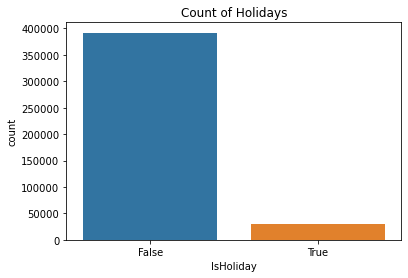

In [ ]:
plt.title('Count of Holidays')
sns.countplot(data['IsHoliday'])
plt.show()

In [ ]:
def annotate_horizontal(splot):
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                       
                   xytext = (0, 9), 
                   textcoords = 'offset points')
        
def annotate_vertical(splot):
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=13,
                    rotation=90  ,
                   xytext = (0, 4), 
                   textcoords = 'offset points')

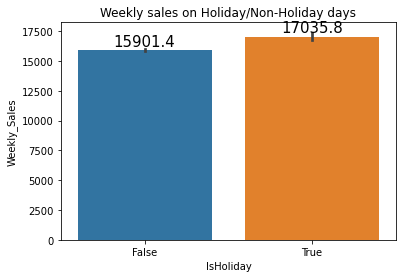

In [ ]:
plt.title("Weekly sales on Holiday/Non-Holiday days")
splot=sns.barplot(x='IsHoliday', y='Weekly_Sales', data=data)
annotate_horizontal(splot)

In [ ]:
print("Average weekly_sales on a Holiday weekend is : {:.2f}". format(np.mean(data['Weekly_Sales'][(data['IsHoliday']==True)])))
print("Average weekly_sales on a non Holiday weekend is : {:.2f}". format(np.mean(data['Weekly_Sales'][(data['IsHoliday']==False)])))


Average weekly_sales on a Holiday weekend is : 17035.82
Average weekly_sales on a non Holiday weekend is : 15901.45


<b>Observation: 
    1. Sales in Holiday weekes is ~8% higher than non Holiday weeks.

<AxesSubplot:title={'center':'Weekly_sales box plt'}, xlabel='Weekly_Sales'>

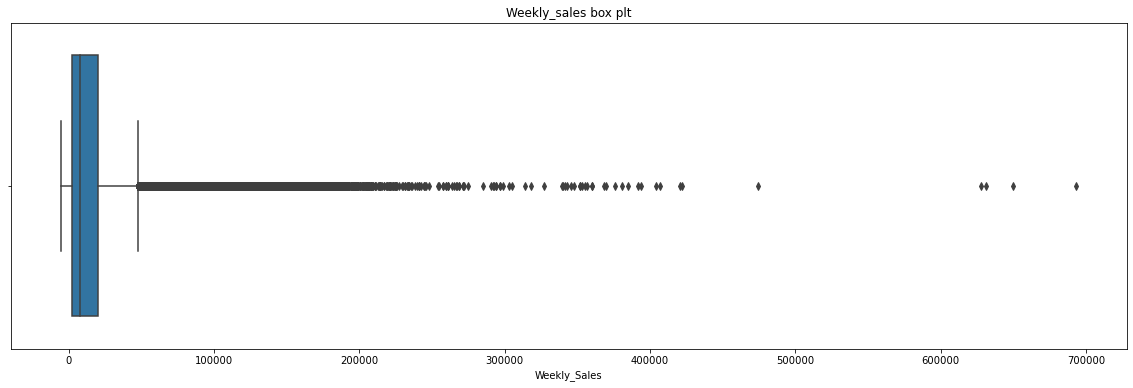

In [ ]:
plt.figure(figsize=(20,6))
plt.title("Weekly_sales box plt")
sns.boxplot(data['Weekly_Sales'])

<<b>Observation:
    1. Most of the sales are in the range of 10k-40k. The highest being >600k which might be during the special days and Holidays. 
    

In [ ]:
data.loc[data['Weekly_Sales']>600000]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
95373,10,72,2010-11-26,693099.36,True,55.33,3.162,NaN,NaN,NaN,NaN,NaN,126.669267,9.003,B,126512
95425,10,72,2011-11-25,630999.19,True,60.68,3.760,174.72,329.0,141630.61,79.00,1009.98,129.836400,7.874,B,126512
337961,35,72,2010-11-26,627962.93,True,46.67,3.039,NaN,NaN,NaN,NaN,NaN,136.689571,8.763,B,103681
338013,35,72,2011-11-25,649770.18,True,47.88,3.492,1333.24,NaN,58563.24,20.97,6386.86,140.421786,8.745,B,103681


Observation: 
    1. These are the 4 days data where the sales are higher than 600k. And these corresponds to ThanksGiving day in different stores in the dept 72.

In [ ]:
for i in range(90,100):
    print(np.percentile(data['Weekly_Sales'],i))

42845.673000000046
45630.06980000002
48745.45440000006
52288.85070000007
56461.394400000005
61201.951
67360.3836
74898.70719999998
85371.96579999998
106479.58599999998


In [ ]:
for i in np.arange(99,100,0.1):
    print(np.percentile(data['Weekly_Sales'],i))

106479.58599999998
109686.70293000009
113083.82927999971
117354.39927999896
123275.63093999907
130447.86984999855
138536.5379999991
147565.68182999536
157664.16793999056
174882.0795999971


<b>Observation:
    1. 99% of the sales are within the range of 170k. And very few days has crossed the range of 200k being the special holidays. 

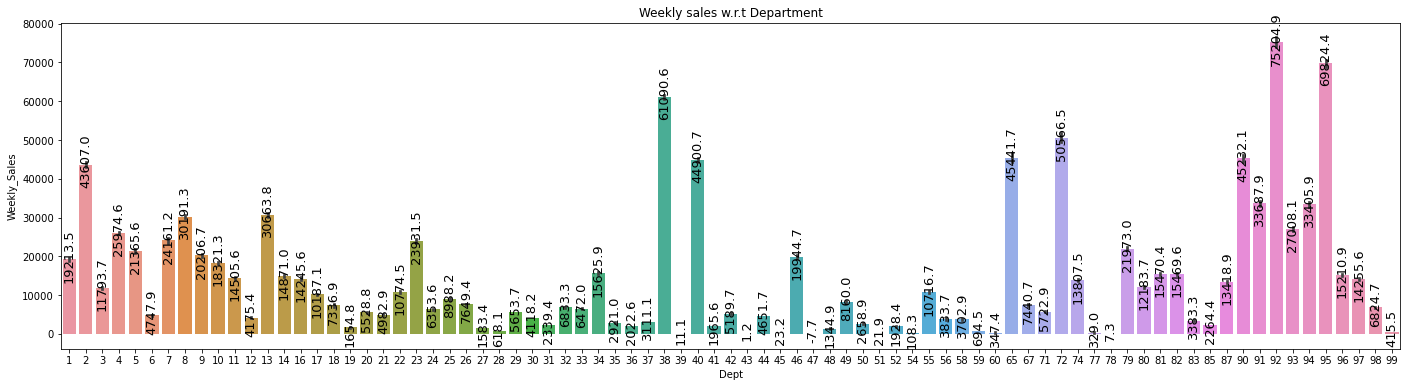

In [ ]:
plt.figure(figsize=(24,6))
plt.title("Weekly sales w.r.t Department")
splot=sns.barplot(x='Dept', y='Weekly_Sales', data=data)
annotate_vertical(splot)

In [ ]:
data['Weekly_Sales'].loc[data['Dept']==43].sum()

14.32

In [ ]:
data['Weekly_Sales'].loc[data['Dept']==92].sum()

483943341.87

<b>Observation:
    1. Dept 92 has the highest recorded weekly sales with 483 Million $ followed by 95 and 38 departments. 
    2. Few of the departments has very low weekly sales records like 43, 47 etc.

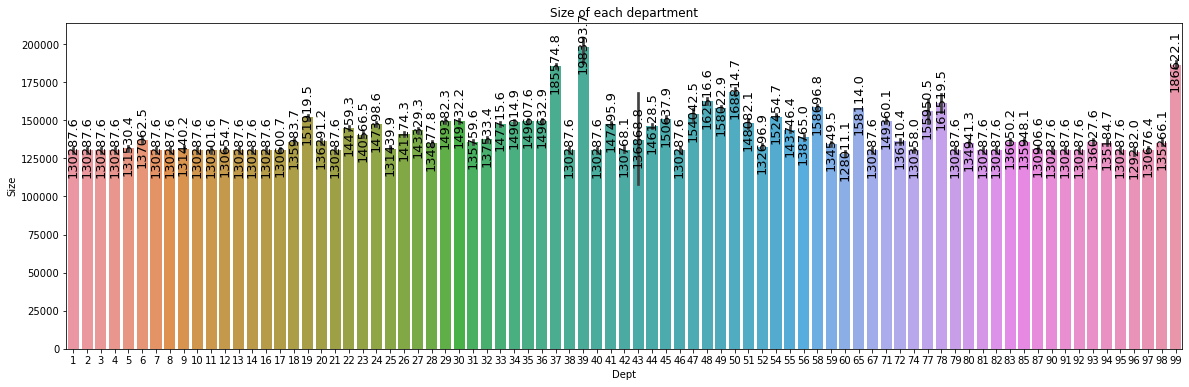

In [ ]:
plt.figure(figsize=(20,6))
plt.title("Size of each department")
splot=sns.barplot(x='Dept', y='Size', data=data)
annotate_vertical(splot)

<b>Observation:
    1. Department size is almost equal for all, though the dept 92,95,38 has highest sales.
    2. This may be because of the cost of items in these depts. 
    3. We can conclude that dept size is not proportional to the weekly sales. 

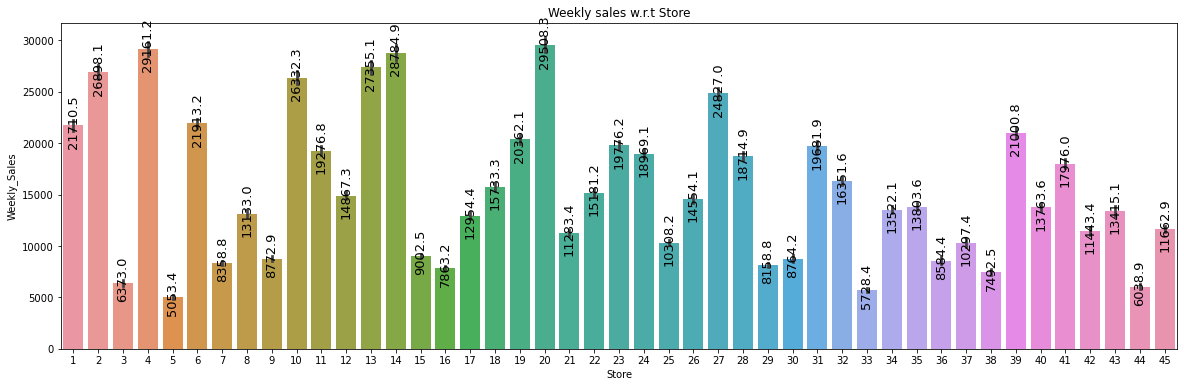

In [ ]:
plt.figure(figsize=(20,6))
plt.title("Weekly sales w.r.t Store")
splot=sns.barplot(x='Store', y='Weekly_Sales', data=data)
annotate_vertical(splot)

<b>Observation:
    1. In particular store 20,14,13,4,2 has the highest weekly sales and this may be due to the location of the stores.  
    

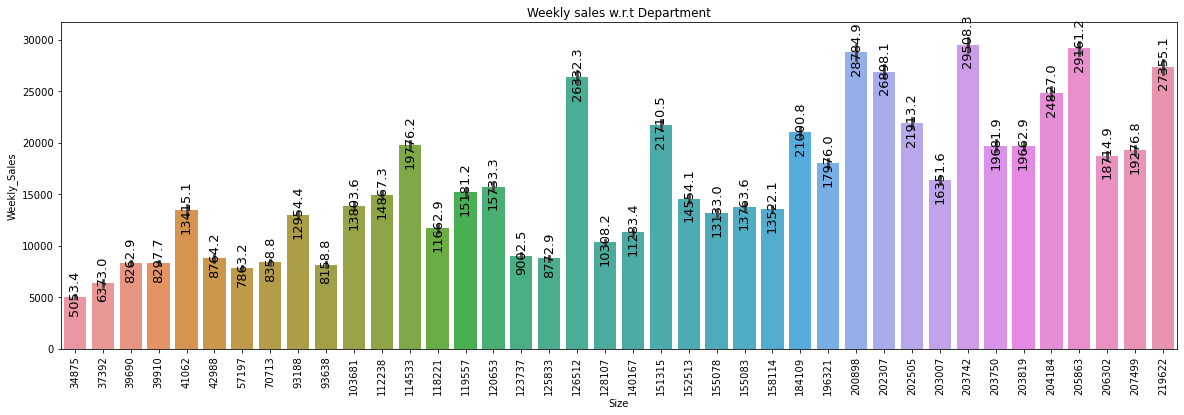

In [ ]:
plt.figure(figsize=(20,6))
plt.title("Weekly sales w.r.t Department")
plt.xticks(rotation='vertical')
splot=sns.barplot(x='Size', y='Weekly_Sales', data=data)
annotate_vertical(splot)

<b>Observation:
    1. Weekly sales are higher for the stores which are larger in size to some extent but cannot be concluded exactly as certain stores with larger size has also recorded a less weekly sale.

In [ ]:
data['Type'].unique()

array(['A', 'B', 'C'], dtype=object)

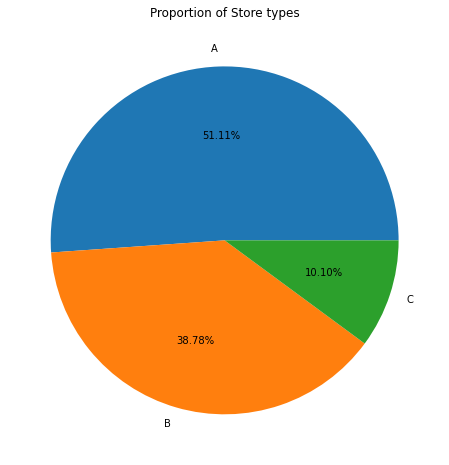

In [ ]:
sums = data['Type'].value_counts()
plt.figure(figsize=(16,8))
#ax.axis('equal')
plt.title("Proportion of Store types")
plt.pie(sums, labels=sums.index,autopct='%1.2f%%');
plt.show()

<b>Observation:
    1. Stores are paritioned into 3 types. Type A, B, C.
    2. Type A stores are larger in proportionate than Type B and C occupying 51%
    3. Type B has the second largerst proportionate occupying 38% of the data.
    

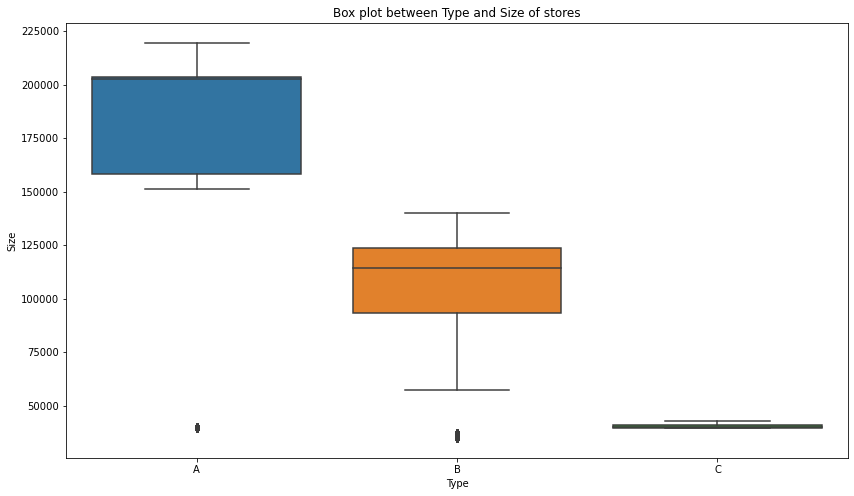

In [ ]:
plt.figure(figsize=(14,8))
plt.title("Box plot between Type and Size of stores")
sns.boxplot(x='Type', y='Size',data=data)
plt.show()

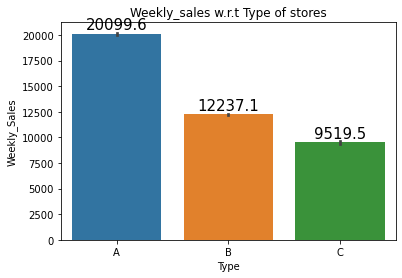

In [ ]:
plt.title("Weekly_sales w.r.t Type of stores")
splot=sns.barplot(x='Type', y='Weekly_Sales', data=data)
annotate_horizontal(splot)

<b>Observation:
    1. Weekly sales are directly proportion to the count of store types. 
    2. Type A stores are higher and the weekly sales are also higher in these stores.
    3. Type C stores are lesser in count and the weeklys sales in these stores are also not high.
    4. Size of Store types A, B, C is not overlapping. We can distinguish the stores with basic if-else. 
    5. All the store size of > 150k can be classified as Store A and if size > 62 k and <  140k can be classified as Store B 
    and rest as Store type C. 
    

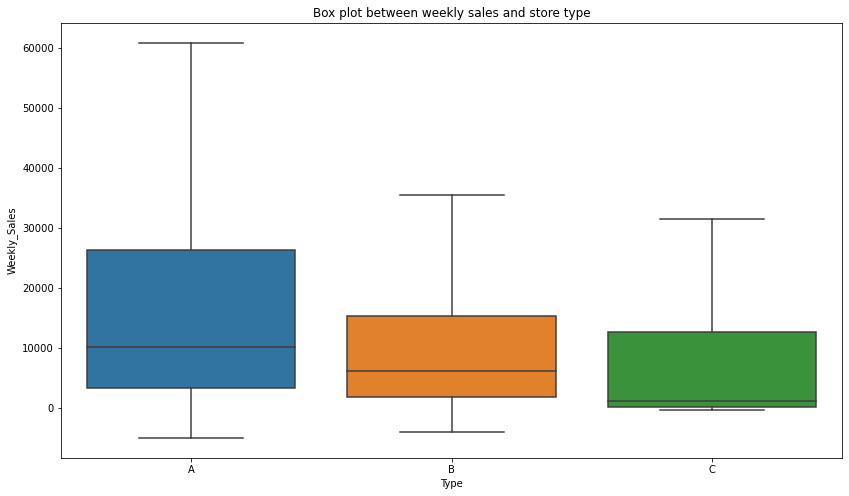

In [ ]:
plt.figure(figsize=(14,8))
plt.title("Box plot between weekly sales and store type")
sns.boxplot(x='Type', y='Weekly_Sales',data=data,showfliers=False)
plt.show()

<b>Observation: 
    
    1. Store type A has median greater than any other store types. 

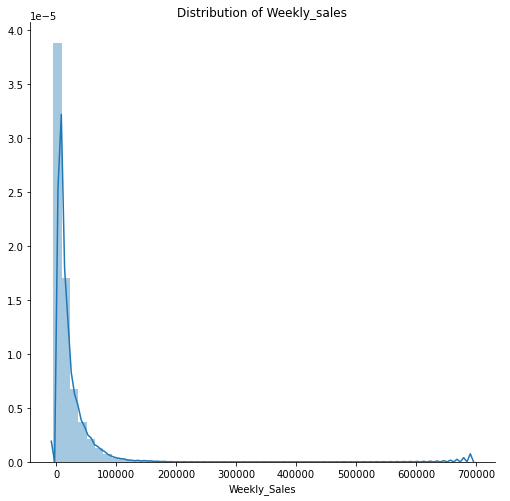

In [ ]:
sns.FacetGrid(data, height=7).map(sns.distplot, "Weekly_Sales").add_legend();
plt.title("Distribution of Weekly_sales")
plt.show()

<b>Observation:
    1. 85% of the sales happened at around 10k. And is more likely representing the powerlaw distribution, as most of 80% of the sales are in the first 20% of the distribution.  

In [ ]:
#Checking for correlation in the data
corr = data.corr()

In [ ]:
corr

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
Store,1.000000,0.024004,-0.085195,-0.000548,-0.050097,0.065290,-0.119588,-0.035173,-0.031556,-0.009941,-0.026634,-0.211088,0.208552,-0.182881
Dept,0.024004,1.000000,0.148032,0.000916,0.004437,0.003572,-0.002426,0.000290,0.001784,0.004257,0.000109,-0.007477,0.007837,-0.002966
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774,-0.002312,-0.000120,0.085251,0.024130,0.060385,0.045414,0.090362,-0.020921,-0.025864,0.243828
IsHoliday,-0.000548,0.000916,0.012774,1.000000,-0.155949,-0.078281,-0.035586,0.334818,0.427960,-0.000562,-0.053719,-0.001944,0.010460,0.000593
Temperature,-0.050097,0.004437,-0.002312,-0.155949,1.000000,0.143859,-0.040594,-0.323927,-0.096880,-0.063947,-0.017544,0.182112,0.096730,-0.058313
Fuel_Price,0.065290,0.003572,-0.000120,-0.078281,0.143859,1.000000,0.061371,-0.220895,-0.102092,-0.044986,-0.128065,-0.164210,-0.033853,0.003361
MarkDown1,-0.119588,-0.002426,0.085251,-0.035586,-0.040594,0.061371,1.000000,0.024486,-0.108115,0.819238,0.160257,-0.055558,0.050285,0.345673
MarkDown2,-0.035173,0.000290,0.024130,0.334818,-0.323927,-0.220895,0.024486,1.000000,-0.050108,-0.007768,-0.007440,-0.039534,0.020940,0.108827
MarkDown3,-0.031556,0.001784,0.060385,0.427960,-0.096880,-0.102092,-0.108115,-0.050108,1.000000,-0.071095,-0.026467,-0.023590,0.012818,0.048913
MarkDown4,-0.009941,0.004257,0.045414,-0.000562,-0.063947,-0.044986,0.819238,-0.007768,-0.071095,1.000000,0.107792,-0.049628,0.024963,0.168196


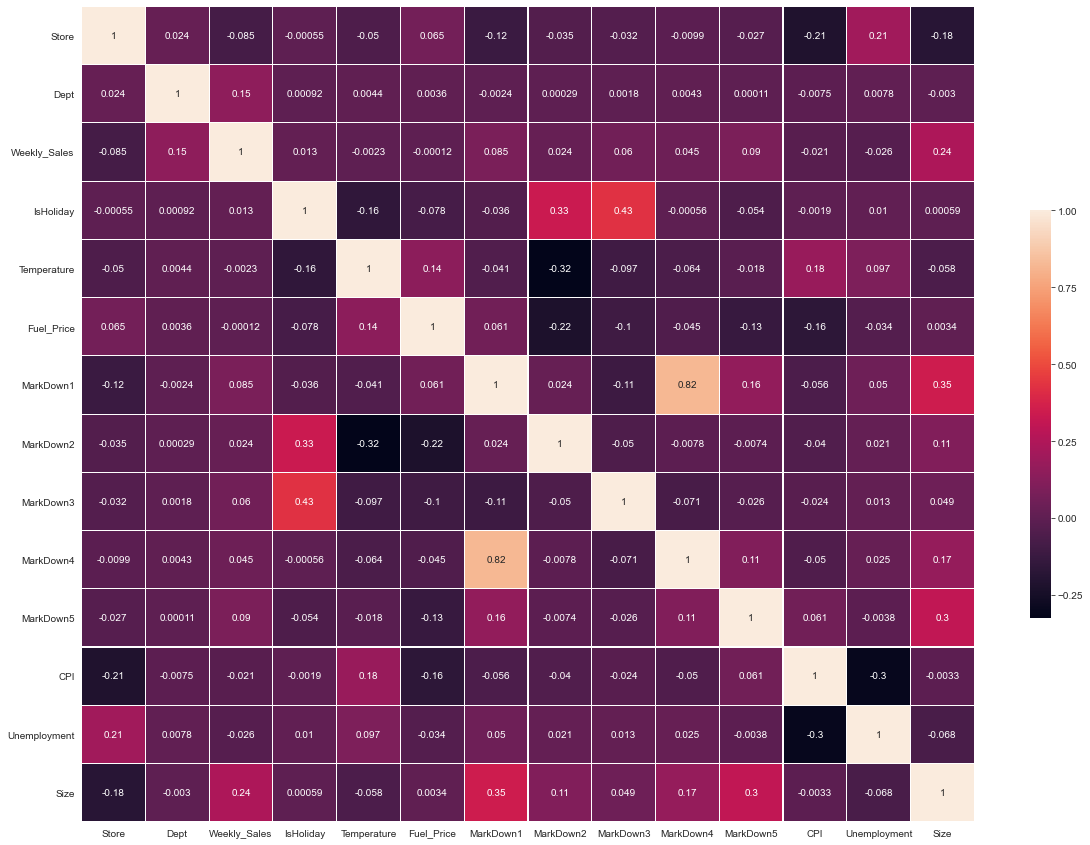

In [ ]:
sns.set_style('dark')
corr = data.corr()
f,ax = plt.subplots(figsize=(20,15))
fig = sns.heatmap(corr, annot=True,linewidths=.2, cbar_kws={"shrink": .5})

<b>Observation:
    
    1. Though there is less correlation it is obvious that the unemployment index increase leads to the less shopping, and this goes with the Fuel_price as well.
    2. Increase and decrease in temperature effects the sales. Lower tem and high temp can makes weekly sales go less.
    
    

In [ ]:
#Checking for NULL values

data.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [ ]:
#MarkDown data is only available after Nov 2011, and is not available for all stores all the time. 
#Any missing value is marked with an NA. Hence wil fill it out with 0.
data=data.fillna(0)

In [ ]:
#Checking on the test_data
test_data.isnull().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
Type                0
Size                0
dtype: int64

<b>Other than Markdowns the CPI and Unemployment is also NULL for 38162 rows. We will fill it with the mean value of the department. For the Markdowns will fill it with the 0.

In [ ]:
test_data["CPI"] = test_data.groupby(["Dept"])['CPI'].transform(lambda x: x.fillna(x.mean()))
test_data["Unemployment"]=test_data.groupby(['Dept'])['Unemployment'].transform(lambda x: x.fillna(x.mean()))
test_data=test_data.fillna(0)

In [ ]:
test_data.isnull().sum()

Store           0
Dept            0
Date            0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [ ]:
# FEATURE ENGINEERING for the date column

#Extracting the info from the Date column as the date directly can't be passed to the Model. 


data['Date']=pd.to_datetime(data.Date)  #Converting the string type to pandas date_time
 
#Extracting year,month, day, day of the year, week of the year, is month start, is month end features.    
    
data['Year']=pd.DatetimeIndex(data['Date']).year  
data['Month']=pd.DatetimeIndex(data['Date']).month
data['Day']=pd.DatetimeIndex(data['Date']).day
data['Day_of_year']=pd.DatetimeIndex(data['Date']).dayofyear
data['Week_of_year']=pd.DatetimeIndex(data['Date']).weekofyear

data['Month_start']=pd.DatetimeIndex(data['Date']).is_month_start
data['Month_end']=pd.DatetimeIndex(data['Date']).is_month_end

In [ ]:
#Extracting the info from the Date column as the date directly can't be passed to the Model. 


test_data['Date']=pd.to_datetime(test_data.Date)  #Converting the string type to pandas date_time
 
#Extracting year,month, day, day of the year, week of the year, is month start, is month end features.    
    
test_data['Year']=pd.DatetimeIndex(test_data['Date']).year  
test_data['Month']=pd.DatetimeIndex(test_data['Date']).month
test_data['Day']=pd.DatetimeIndex(test_data['Date']).day
test_data['Day_of_year']=pd.DatetimeIndex(test_data['Date']).dayofyear
test_data['Week_of_year']=pd.DatetimeIndex(test_data['Date']).weekofyear

test_data['Month_start']=pd.DatetimeIndex(test_data['Date']).is_month_start
test_data['Month_end']=pd.DatetimeIndex(test_data['Date']).is_month_end

In [ ]:
data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Unemployment,Type,Size,Year,Month,Day,Day_of_year,Week_of_year,Month_start,Month_end
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.00,...,8.106,A,151315,2010,2,5,36,5,False,False
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.00,0.00,0.00,...,8.106,A,151315,2010,2,12,43,6,False,False
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.00,0.00,0.00,...,8.106,A,151315,2010,2,19,50,7,False,False
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.00,0.00,0.00,...,8.106,A,151315,2010,2,26,57,8,False,False
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.00,0.00,0.00,...,8.106,A,151315,2010,3,5,64,9,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,...,8.684,B,118221,2012,9,28,272,39,False,False
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,0.00,18.82,...,8.667,B,118221,2012,10,5,279,40,False,False
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,0.00,7.89,...,8.667,B,118221,2012,10,12,286,41,False,False
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,0.00,3.18,...,8.667,B,118221,2012,10,19,293,42,False,False


In [ ]:
test_data

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Unemployment,Type,Size,Year,Month,Day,Day_of_year,Week_of_year,Month_start,Month_end
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,...,6.573000,A,151315,2012,11,2,307,44,False,False
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,...,6.573000,A,151315,2012,11,9,314,45,False,False
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,...,6.573000,A,151315,2012,11,16,321,46,False,False
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,...,6.573000,A,151315,2012,11,23,328,47,False,False
4,1,1,2012-11-30,False,52.34,3.207,2460.03,0.00,3838.35,150.57,...,6.573000,A,151315,2012,11,30,335,48,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,76.05,3.639,4842.29,975.03,3.00,2449.97,...,6.952744,B,118221,2013,6,28,179,26,False,False
115060,45,98,2013-07-05,False,77.50,3.614,9090.48,2268.58,582.74,5797.47,...,6.952744,B,118221,2013,7,5,186,27,False,False
115061,45,98,2013-07-12,False,79.37,3.614,3789.94,1827.31,85.72,744.84,...,6.952744,B,118221,2013,7,12,193,28,False,False
115062,45,98,2013-07-19,False,82.84,3.737,2961.49,1047.07,204.19,363.00,...,6.952744,B,118221,2013,7,19,200,29,False,False


In [ ]:
import math
def add_week_of_month(df):
    df['week_in_month'] = pd.to_numeric(df.Day/7)
    df['week_in_month'] = df['week_in_month'].apply(lambda x: math.ceil(x))
    return df

In [ ]:
add_week_of_month(test_data)

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Type,Size,Year,Month,Day,Day_of_year,Week_of_year,Month_start,Month_end,week_in_month
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,...,A,151315,2012,11,2,307,44,False,False,1
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,...,A,151315,2012,11,9,314,45,False,False,2
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,...,A,151315,2012,11,16,321,46,False,False,3
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,...,A,151315,2012,11,23,328,47,False,False,4
4,1,1,2012-11-30,False,52.34,3.207,2460.03,0.00,3838.35,150.57,...,A,151315,2012,11,30,335,48,False,True,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,76.05,3.639,4842.29,975.03,3.00,2449.97,...,B,118221,2013,6,28,179,26,False,False,4
115060,45,98,2013-07-05,False,77.50,3.614,9090.48,2268.58,582.74,5797.47,...,B,118221,2013,7,5,186,27,False,False,1
115061,45,98,2013-07-12,False,79.37,3.614,3789.94,1827.31,85.72,744.84,...,B,118221,2013,7,12,193,28,False,False,2
115062,45,98,2013-07-19,False,82.84,3.737,2961.49,1047.07,204.19,363.00,...,B,118221,2013,7,19,200,29,False,False,3


In [ ]:
add_week_of_month(data)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Type,Size,Year,Month,Day,Day_of_year,Week_of_year,Month_start,Month_end,week_in_month
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.00,...,A,151315,2010,2,5,36,5,False,False,1
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.00,0.00,0.00,...,A,151315,2010,2,12,43,6,False,False,2
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.00,0.00,0.00,...,A,151315,2010,2,19,50,7,False,False,3
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.00,0.00,0.00,...,A,151315,2010,2,26,57,8,False,False,4
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.00,0.00,0.00,...,A,151315,2010,3,5,64,9,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,...,B,118221,2012,9,28,272,39,False,False,4
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,0.00,18.82,...,B,118221,2012,10,5,279,40,False,False,1
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,0.00,7.89,...,B,118221,2012,10,12,286,41,False,False,2
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,0.00,3.18,...,B,118221,2012,10,19,293,42,False,False,3


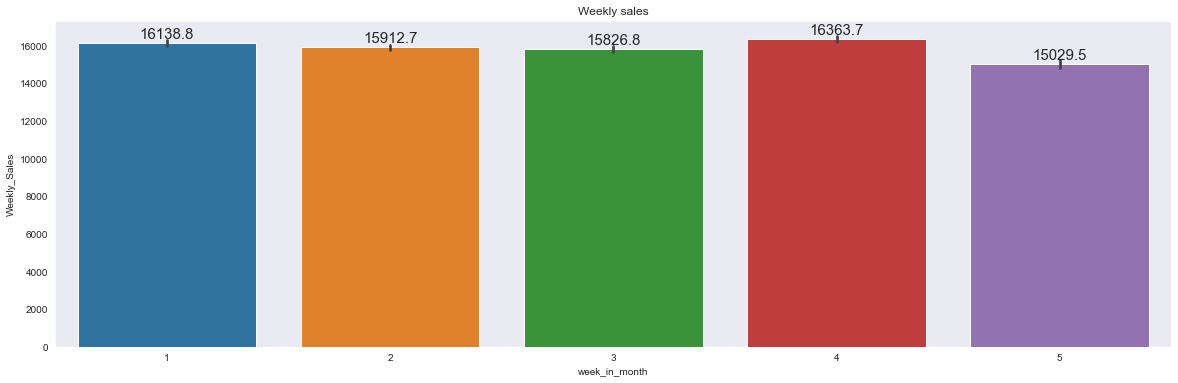

In [ ]:
plt.figure(figsize=(20,6))
plt.title("Weekly sales")

splot=sns.barplot(x='week_in_month', y='Weekly_Sales', data=data)

annotate_horizontal(splot)




In [ ]:
week_1_4=np.mean(data['Weekly_Sales'][(data['week_in_month']==1 ) |  (data['week_in_month']==4)])

week_2_3_5=np.mean(data['Weekly_Sales'][(data['week_in_month']==2 ) |  (data['week_in_month']==3)  | (data['week_in_month']==3)] )

if week_1_4 > week_2_3_5:
    print("There is an inrease in sales of {:.2f}% in week 1,4 than other weeks".format(((week_1_4- week_2_3_5)/week_2_3_5)*100))
else:
    print("There is an decrease in sales of {:.2f}% in week 1,4 than other weeks".format(((week_2_3_5- week_1_4)/week_1_4)*100))


There is an inrease in sales of 2.40% in week 1,4 than other weeks


<b>Observation: 

Weekly sales on average is High in 4th month but not significantly high. That is end of the month the weekly sales are higher than usual sales from the beginning of the month.

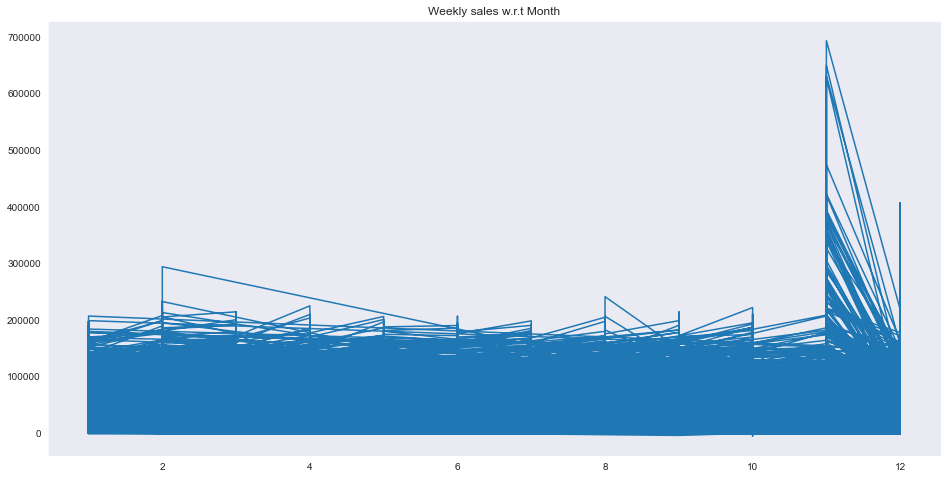

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Weekly sales w.r.t Month")
plt.plot(data['Month'], data['Weekly_Sales'])

Text(0.5, 1.0, 'Bar plot for weeklt sales w.r.t Month')

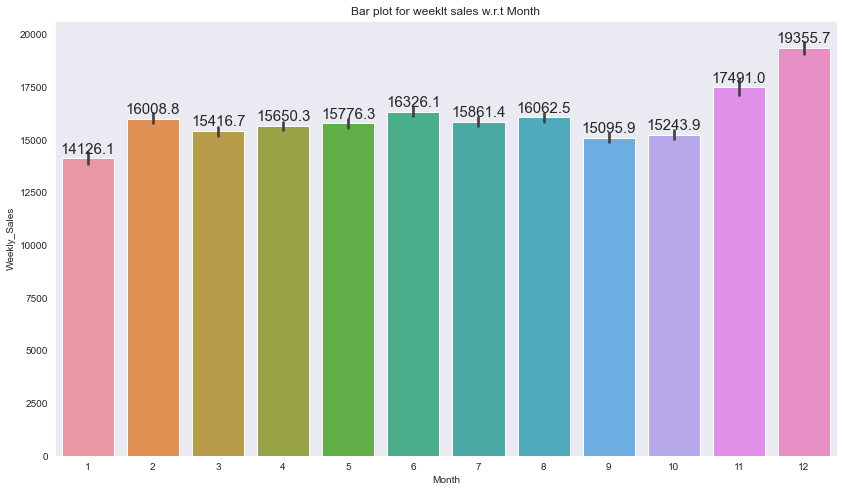

In [ ]:
plt.figure(figsize=(14,8))
splot=sns.barplot(data['Month'], data['Weekly_Sales'])
annotate_horizontal(splot)
plt.title("Bar plot for weeklt sales w.r.t Month")


In [ ]:
monthly_1_10=np.mean(data['Weekly_Sales'][(data['Month']!=12) | (data['Month']!=11)])
monthly_11_12=np.mean(data['Weekly_Sales'][(data['Month']==12)  | (data['Month']==11)])

print("There is an inrease in sales of {:.2f}% in month 11,12 than other months".format(((monthly_11_12- monthly_1_10)/monthly_1_10)*100))

There is an inrease in sales of 15.96% in month 11,12 than other months


<b>Observation:
    
    1. Dec, Nov months has slight higher sales. This may be because of the Thanksgiving day, Christmas season. 

Text(0.5, 1.0, 'Weekly sales each year')

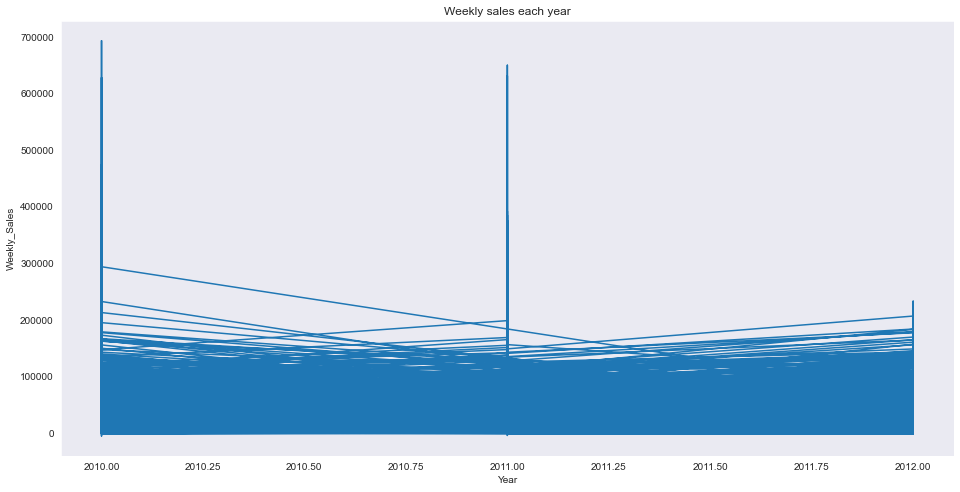

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(data['Year'], data['Weekly_Sales'])
plt.xlabel('Year')
plt.ylabel('Weekly_Sales')
plt.title('Weekly sales each year')

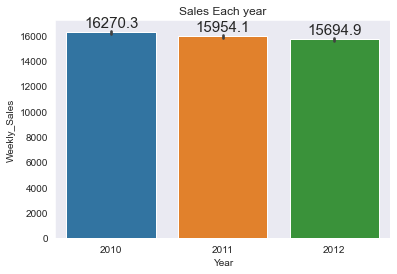

In [ ]:
plt.title("Sales Each year")
splot=sns.barplot(data['Year'], data['Weekly_Sales'])
annotate_horizontal(splot)

<b>Observation:
    1. There is no difference in the average of sales throughout the given 3 years of data. Sales remain almost similar. 

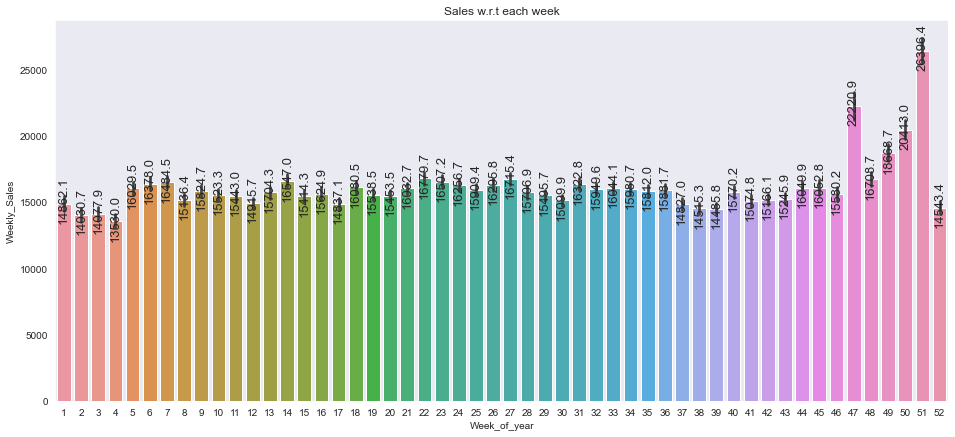

In [ ]:
plt.figure(figsize=(16,7))
plt.title("Sales w.r.t each week")
splot=sns.barplot(x='Week_of_year', y='Weekly_Sales',data=data)
annotate_vertical(splot)

<AxesSubplot:title={'center':'Sales w.r.t each week'}, xlabel='Week_of_year', ylabel='Weekly_Sales'>

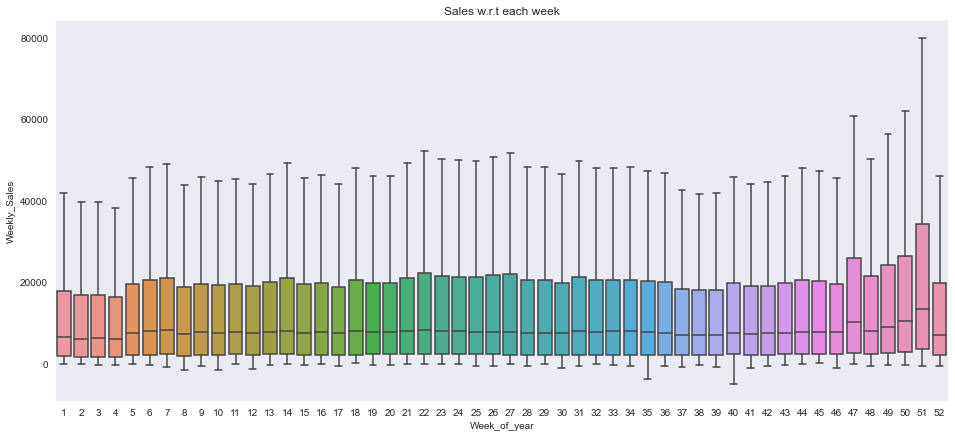

In [ ]:
plt.figure(figsize=(16,7))
plt.title("Sales w.r.t each week")
sns.boxplot(x='Week_of_year', y='Weekly_Sales',data=data,showfliers=False)

<b>Observation:
    1. Sales in the 51st,47th week is significantly higher, and this is because of the Christmas days, Thanksgiving days respectively. 
    
    

In [ ]:
data.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Year', 'Month',
       'Day', 'Day_of_year', 'Week_of_year', 'Month_start', 'Month_end',
       'week_in_month'],
      dtype='object')

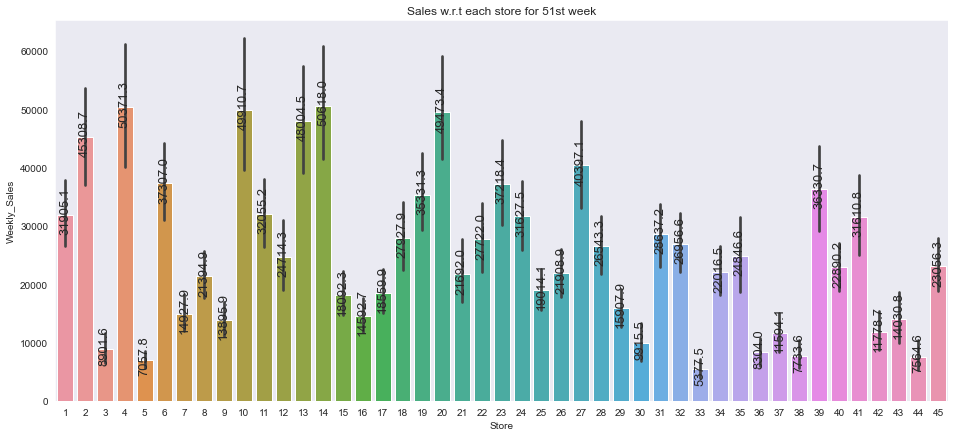

In [ ]:
plt.figure(figsize=(16,7))
plt.title("Sales w.r.t each store for 51st week")
splot=sns.barplot(x=data['Store'],y=data['Weekly_Sales'][data['Week_of_year']==51])
annotate_vertical(splot)

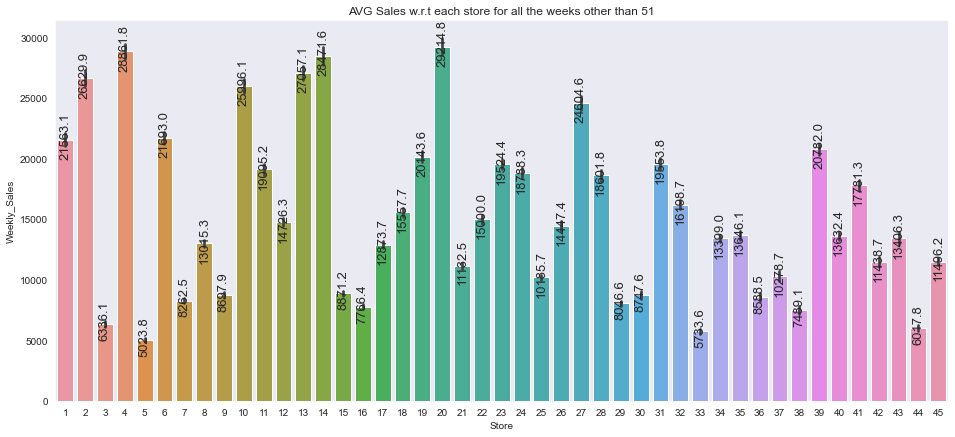

In [ ]:
plt.figure(figsize=(16,7))
plt.title("AVG Sales w.r.t each store for all the weeks other than 51")
splot=sns.barplot(x=data['Store'],y=data['Weekly_Sales'][data['Week_of_year']!=51])
annotate_vertical(splot)

In [ ]:
print("Avg sales of all the stores in 51st week is :",(np.mean(data['Weekly_Sales'][data['Week_of_year']==51].tolist())))
print("Avg weekly sales of all the stores except 51st week is :", (np.mean(data['Weekly_Sales'][data['Week_of_year']!=51].tolist())))


Avg sales of all the stores in 51st week is : 26396.39928296841
Avg weekly sales of all the stores except 51st week is : 15831.31649979427


<b>Observation :
    1. Weekly sales in all the stores in the week of 51 hiked up due to the christmas season.
    2. Avg sales in all the stores in the remaining weeks being 158k$ the 51st week recorded 263k$  i.e: An increase of ~60% can be seen.

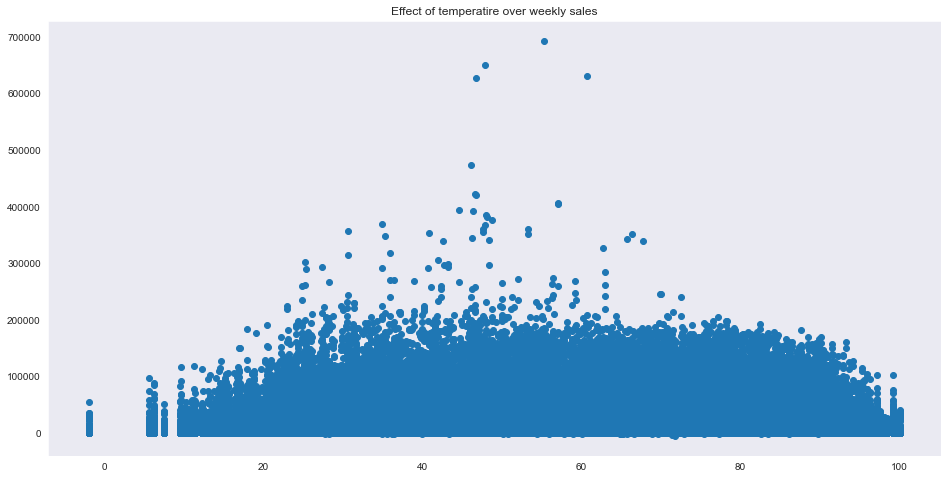

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(data['Temperature'], data['Weekly_Sales'])
plt.title("Effect of temperatire over weekly sales")
plt.show()

<b>Observation:
    1. Average temperature ranges in  40-65 and the sales are higher in the mean temperatures. 
    2. Sales has an effect in lower temperatures and > 90  degrees temp.

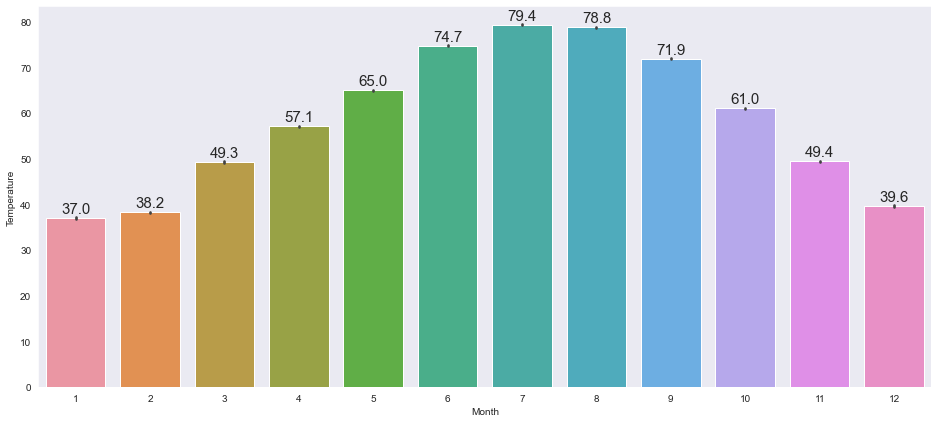

In [ ]:
plt.figure(figsize=(16,7))

splot=sns.barplot(x='Month', y='Temperature',data=data)
annotate_horizontal(splot)

In [ ]:
for i in data['Month'].unique():
    
    
    if (np.mean(data['Weekly_Sales'][data['Month']==i]) < np.mean(data['Weekly_Sales'][data['Month']==i+1])):
        increase=(np.mean(data['Weekly_Sales'][data['Month']==i+1])-np.mean(data['Weekly_Sales'][data['Month']==i]))/(np.mean(data['Weekly_Sales'][data['Month']==i]))
        
        print("There is an weekly_sales increase of {:.2f}% in between {},{} months".format(increase*100,i,i+1))
        
    elif(np.mean(data['Weekly_Sales'][data['Month']==i]) > np.mean(data['Weekly_Sales'][data['Month']==i+1])):
    
        decrease=(np.mean(data['Weekly_Sales'][data['Month']==i])-np.mean(data['Weekly_Sales'][data['Month']==i+1]))/(np.mean(data['Weekly_Sales'][data['Month']==i+1]))
        
        print("There is an weekly_sales decrease of {:.2f}% in between {},{} months".format(decrease*100,i,i+1))

There is an weekly_sales decrease of 3.84% in between 2,3 months
There is an weekly_sales increase of 1.52% in between 3,4 months
There is an weekly_sales increase of 0.81% in between 4,5 months
There is an weekly_sales increase of 3.48% in between 5,6 months
There is an weekly_sales decrease of 2.93% in between 6,7 months
There is an weekly_sales increase of 1.27% in between 7,8 months
There is an weekly_sales decrease of 6.40% in between 8,9 months
There is an weekly_sales increase of 0.98% in between 9,10 months
There is an weekly_sales increase of 14.74% in between 10,11 months
There is an weekly_sales increase of 10.66% in between 11,12 months
There is an weekly_sales increase of 13.33% in between 1,2 months


In [ ]:
data[['Month','IsHoliday']][data['IsHoliday']==True].groupby(by='Month').count()

,IsHoliday
Month,
2,8895
9,8861
11,5959
12,5946


<b>Observation:
    
    1. The highest decrease of sales is in between 8th to 9th month that is because of the the temperature fall.
    2. As the temperature increases the sales are increasing in most cases, but inversely the sales are increasing in the months of 11,12 th month inspite of the temperature decreasing because of the Holidays. 

In [ ]:
store_sales_temp=[]

for i in range(1,46):
    
    if (np.mean(data['Weekly_Sales'][(data['Month']==7) & (data['Store']==i)])) > np.mean(data['Weekly_Sales'][(data['Month']!=7) & (data['Store']==i)]):
        per_increase=(np.mean(data['Weekly_Sales'][(data['Month']==7) & (data['Store']==i)])-np.mean(data['Weekly_Sales'][(data['Month']!=7) & (data['Store']==i)]) )/  (np.mean(data['Weekly_Sales'][(data['Month']!=7) & (data['Store']==i)]))
        print("There is an increase of {:.2f}% in the 7th month in store {}".format(per_increase*100,i))
        
        store_sales_temp.append(per_increase*100)
        
        
    else:
        per_decrease=(np.mean(data['Weekly_Sales'][(data['Month']!=7) & (data['Store']==i)])-np.mean(data['Weekly_Sales'][(data['Month']==7) & (data['Store']==i)]) )/  (np.mean(data['Weekly_Sales'][(data['Month']==7) & (data['Store']==i)])) 
        print("There is a decrease of {:.2f}% in the 7th month in store {}".format(per_decrease*100,i))
        
        store_sales_temp.append((per_decrease-(2*per_decrease))*100)
        
        
   
   
    

There is a decrease of 4.21% in the 7th month in store 1
There is a decrease of 4.02% in the 7th month in store 2
There is a decrease of 5.60% in the 7th month in store 3
There is a decrease of 4.33% in the 7th month in store 4
There is a decrease of 3.94% in the 7th month in store 5
There is an increase of 5.11% in the 7th month in store 6
There is an increase of 19.45% in the 7th month in store 7
There is a decrease of 6.53% in the 7th month in store 8
There is a decrease of 6.77% in the 7th month in store 9
There is a decrease of 5.49% in the 7th month in store 10
There is a decrease of 4.64% in the 7th month in store 11
There is a decrease of 7.04% in the 7th month in store 12
There is a decrease of 0.46% in the 7th month in store 13
There is a decrease of 4.48% in the 7th month in store 14
There is an increase of 1.48% in the 7th month in store 15
There is an increase of 16.15% in the 7th month in store 16
There is an increase of 2.94% in the 7th month in store 17
There is a decre

In [ ]:
max_store_sales_temp_index=store_sales_temp.index(max(store_sales_temp))
min_store_sales_temp_index=store_sales_temp.index(min(store_sales_temp))
print("Average weekly sales in 7th month is  hiked up by max by {:.2f}% in the Store : {}".format(max(store_sales_temp), max_store_sales_temp_index+1))
print("Average weekly sales in 7th month is  decreased max by {:.2f}% in the Store : {}".format(min(store_sales_temp), min_store_sales_temp_index+1))


Average weekly sales in 7th month is  hiked up by max by 19.45% in the Store : 7
Average weekly sales in 7th month is  decreased max by -7.04% in the Store : 12


<b>Observation: 
    1. In the store number 7 we can see that there is an increase of 40% sales on an average compared to all other months being the highest temperature month. 

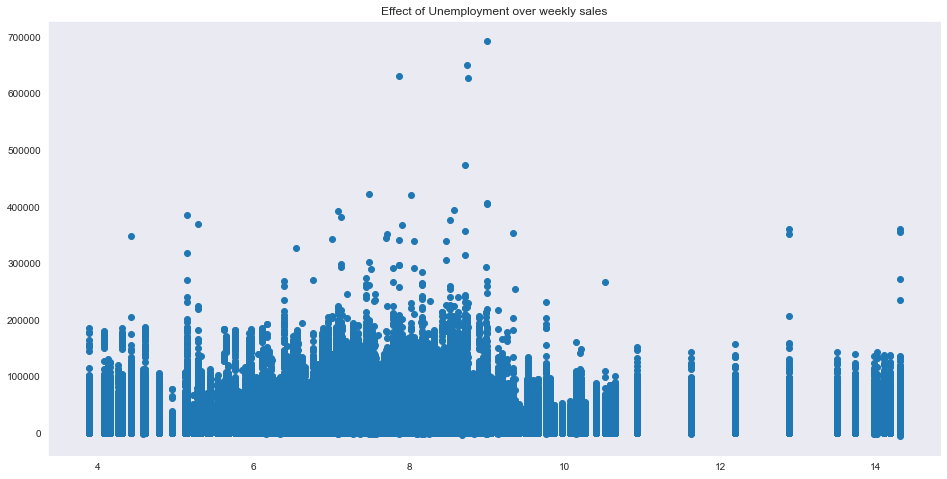

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(data['Unemployment'], data['Weekly_Sales'])
plt.title("Effect of Unemployment over weekly sales")
plt.show()

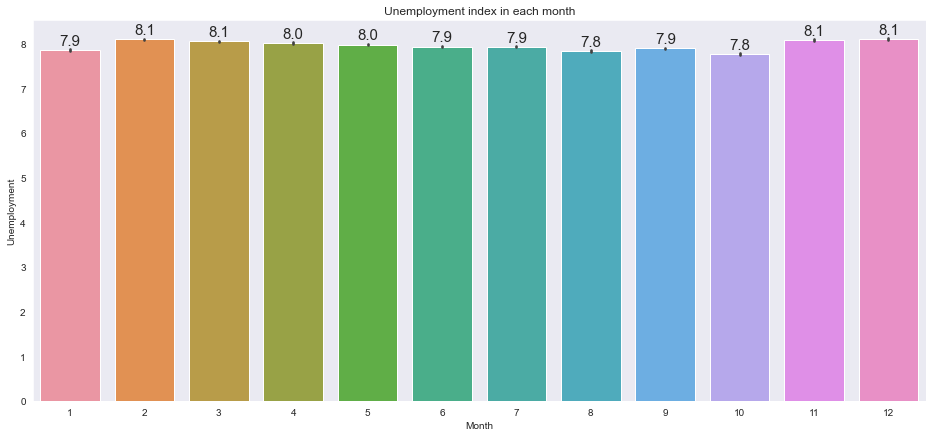

In [ ]:
plt.figure(figsize=(16,7))
plt.title("Unemployment index in each month")
splot=sns.barplot(x='Month', y='Unemployment',data=data)
annotate_horizontal(splot)


In [ ]:
weekly_sales_least_unemployment=np.mean(data['Weekly_Sales'][data['Unemployment']<=7.8])
weekly_sales_highest_unemployment=np.mean(data['Weekly_Sales'][data['Unemployment']<=8.1])


if weekly_sales_highest_unemployment > weekly_sales_least_unemployment:
    print("There is an inrease in sales of {:.2f}% inspite of unemployment rise from 7.8 to 8.1".format(((weekly_sales_highest_unemployment- weekly_sales_least_unemployment)/weekly_sales_least_unemployment)*100))
else:
    print("There is an decrease in sales of {:.2f}% inspite of unemployment decrease from 8.1 to 7.8".format(((weekly_sales_least_unemployment- weekly_sales_highest_unemployment)/weekly_sales_highest_unemployment)*100))

There is an inrease in sales of 2.22% inspite of unemployment rise from 7.8 to 8.1


<b>Observation:
    1. Unemployment index is mostly in range of 5-9.
    2. Average sales of 200k is happening all the time without the factor of unemployment index.
    3. Unemployment is almost similar in all the months
    4. Hence unemployment is not much affecting the weekly_sales. 
    5. Weekly Sales are not effected by unemployment, though there is rise in unemployment there is no significatn decrease and instead there is an increase in sales of 2.22% irrespective to the unemployment index. 

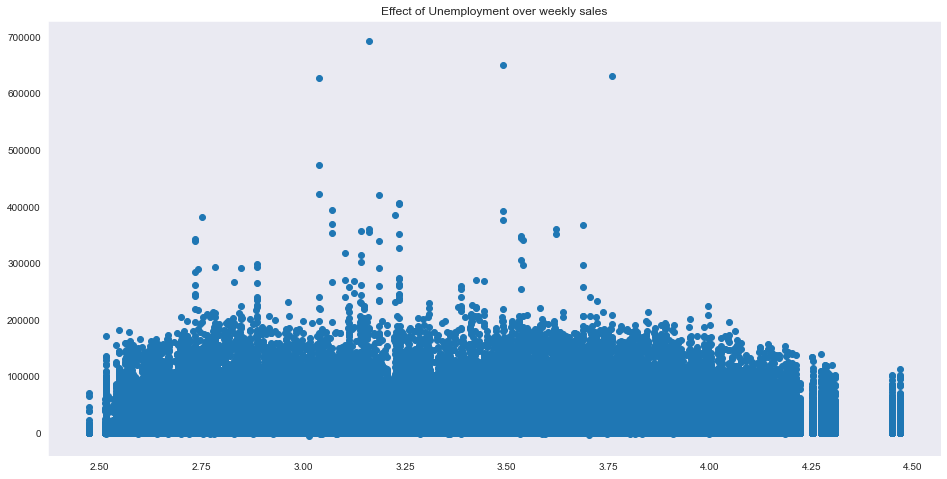

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(data['Fuel_Price'], data['Weekly_Sales'])
plt.title("Effect of Unemployment over weekly sales")
plt.show()

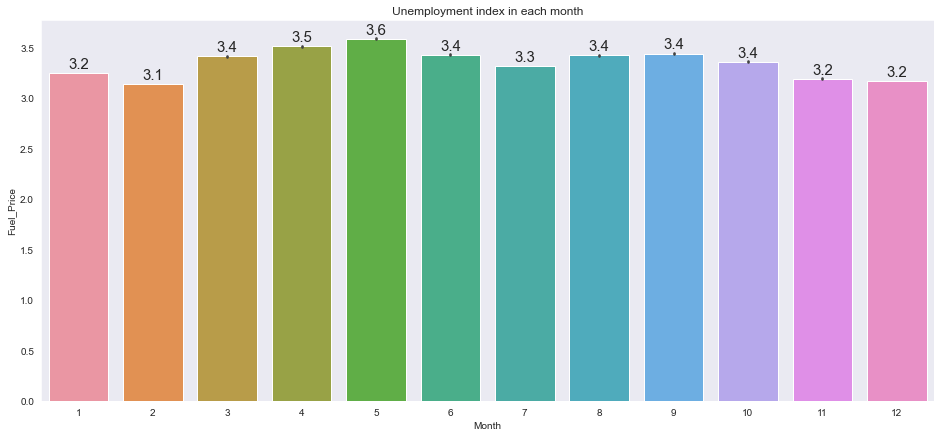

In [ ]:
plt.figure(figsize=(16,7))
plt.title("Unemployment index in each month")
splot=sns.barplot(x='Month', y='Fuel_Price',data=data)
annotate_horizontal(splot)

In [ ]:
print("Avg sales of all the stores when the Fuel price is >3.25 :",(np.mean(data['Weekly_Sales'][data['Fuel_Price']>3.25].tolist())))
print("Avg sales of all the stores when the Fuel price is <3.25 :", (np.mean(data['Weekly_Sales'][data['Fuel_Price']<3.25].tolist())))


Avg sales of all the stores when the Fuel price is >3.25 : 15890.986434810762
Avg sales of all the stores when the Fuel price is <3.25 : 16112.978255254357


In [ ]:
for i in data['Month'].unique():
    
    
    if (np.mean(data['Weekly_Sales'][data['Month']==i]) < np.mean(data['Weekly_Sales'][data['Month']==i+1])):
        increase=(np.mean(data['Weekly_Sales'][data['Month']==i+1])-np.mean(data['Weekly_Sales'][data['Month']==i]))/(np.mean(data['Weekly_Sales'][data['Month']==i]))
        
        print("There is an weekly_sales increase of {:.2f}% in between {},{} months".format(increase*100,i,i+1))
        
    elif(np.mean(data['Weekly_Sales'][data['Month']==i]) > np.mean(data['Weekly_Sales'][data['Month']==i+1])):
    
        decrease=(np.mean(data['Weekly_Sales'][data['Month']==i])-np.mean(data['Weekly_Sales'][data['Month']==i+1]))/(np.mean(data['Weekly_Sales'][data['Month']==i+1]))
        
        print("There is an weekly_sales decrease of {:.2f}% in between {},{} months".format(decrease*100,i,i+1))

There is an weekly_sales decrease of 3.84% in between 2,3 months
There is an weekly_sales increase of 1.52% in between 3,4 months
There is an weekly_sales increase of 0.81% in between 4,5 months
There is an weekly_sales increase of 3.48% in between 5,6 months
There is an weekly_sales decrease of 2.93% in between 6,7 months
There is an weekly_sales increase of 1.27% in between 7,8 months
There is an weekly_sales decrease of 6.40% in between 8,9 months
There is an weekly_sales increase of 0.98% in between 9,10 months
There is an weekly_sales increase of 14.74% in between 10,11 months
There is an weekly_sales increase of 10.66% in between 11,12 months
There is an weekly_sales increase of 13.33% in between 1,2 months


<b>Observation:
    1. Fuel price ranges from 2.6-4.25 and the weekly sales is constant less than 200k
    2. Average sales is high when the Fuel_price is less than 3.25
    3. During the month of May the fuel_price is high due to which the sales have gone low. 
    4. There is a decrease in sales of 3.84% between the 2nd and 3rd month, this may be beacause of the increase in Fuel price and the increase in temperature. 
    

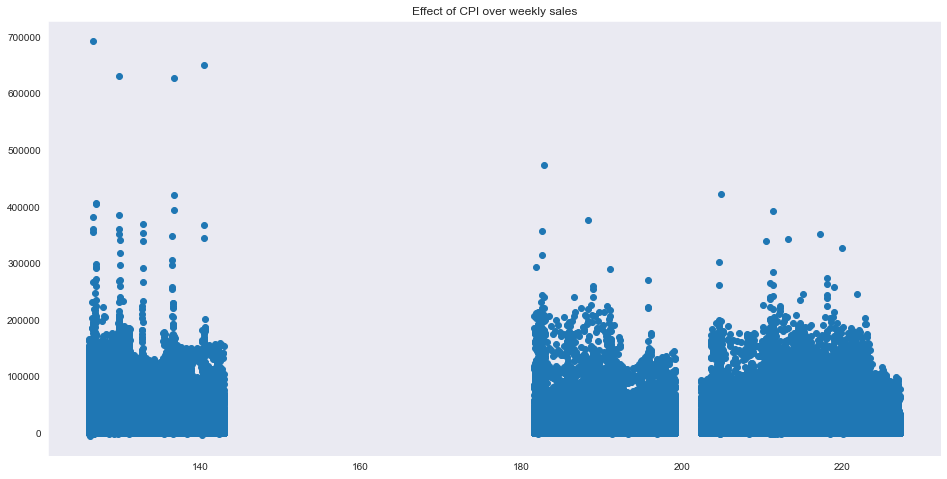

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(data['CPI'], data['Weekly_Sales'])
plt.title("Effect of CPI over weekly sales")
plt.show()

<b>Observation:
    1. There is no continous data for the CPI index. There is no observed data with the CPI from 150-180. 
    2. Weekly sales are slight higher as the CPI is in range of 210-225.

In [ ]:
month_start_sales=np.mean(data['Weekly_Sales'][data['Month_start']==True])
month_end_sales= np.mean(data['Weekly_Sales'][data['Month_end']==True])


print("There is an icrease of {:.2f}% sales in month_starting compared to month ending".format((month_start_sales-month_end_sales)/month_end_sales*100))

There is an icrease of 4.79% sales in month_starting compared to month ending


<b>Observation:
    1. There is 4.79% increase in sales in the month starting and this may be because of the credit of the salary in the month start.

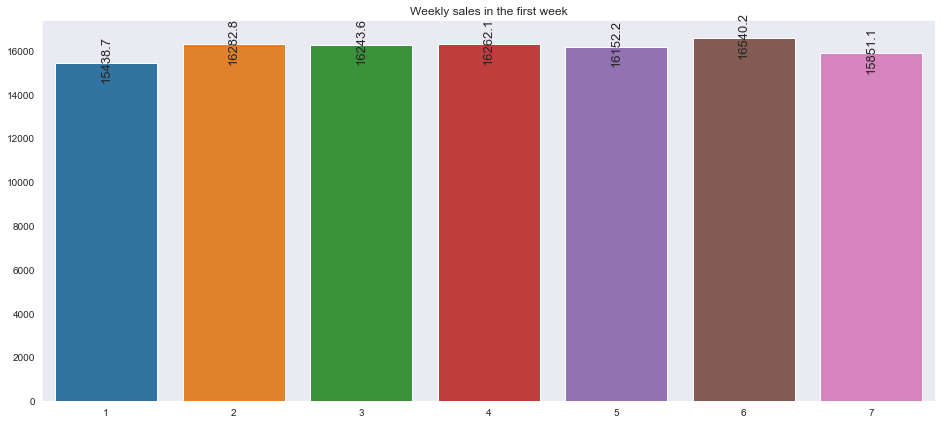

In [ ]:
sales=[]
for i in [1,2,3,4,5,6,7]:
    sales.append(np.mean(data['Weekly_Sales'][data['Day']==i]))
    
    
plt.figure(figsize=(16,7))
plt.title("Weekly sales in the first week")    
splot=sns.barplot(x=[1,2,3,4,5,6,7], y=sales,data=data)
annotate_vertical(splot)

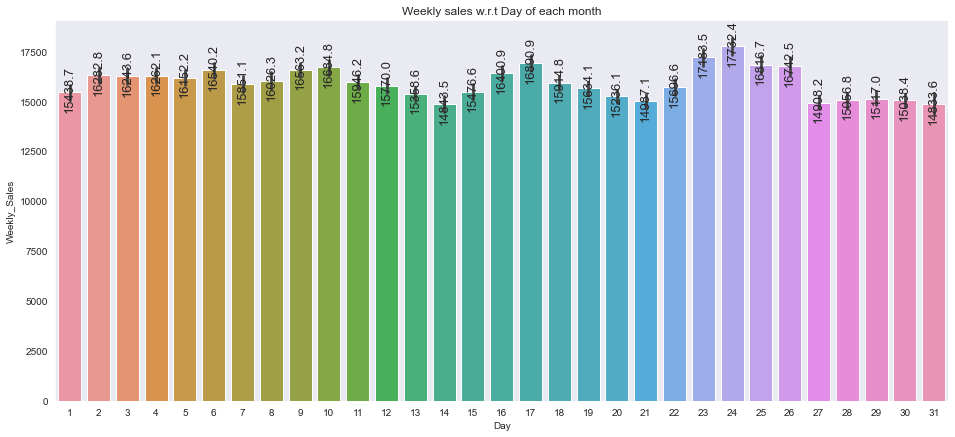

In [ ]:
plt.figure(figsize=(16,7))
plt.title("Weekly sales w.r.t Day of each month")
splot=sns.barplot(x='Day', y='Weekly_Sales',data=data)
annotate_vertical(splot)

<b>Observation:
    
    1.  Sales are high in the week start of the month end. And again high in the first week of the month.

In [ ]:
#Adding special days as a feature with boolean value. These dates are already specified in the Kaggle.


data['Super_Bowl'] = np.where(
(data['Date']==datetime(2010,2,10))|
(data['Date'] == datetime(2011,2,11))|
(data['Date'] == datetime(2012,2,10))|
(data['Date'] == datetime(2013,2,8)), 1, 0)



data['Labor_day'] = np.where(
(data['Date'] == datetime(2010,9,10))|
(data['Date'] == datetime(2011,9,9))| 
(data['Date'] == datetime(2012,9,7))|
(data['Date'] == datetime(2013,9,6)), 1, 0)

data['Thanksgiving'] = np.where(
(data['Date']==datetime(2010, 11, 26)) | (data['Date']==datetime(2011, 11, 25)) | 
(data['Date']==datetime(2012, 11, 23)) | (data['Date']==datetime(2013, 11, 29)),1,0)

data['Christmas'] = np.where(
(data['Date']==datetime(2010, 12, 31))| (data['Date']==datetime(2011, 12, 30))| 
(data['Date']==datetime(2012, 12, 28))| (data['Date']==datetime(2013, 12, 27)),1,0)

In [ ]:
#Adding special days as a feature with boolean value. These dates are already specified in the Kaggle.


test_data['Super_Bowl'] = np.where(
(test_data['Date']==datetime(2010,2,10))|
(test_data['Date'] == datetime(2011,2,11))|
(test_data['Date'] == datetime(2012,2,10))|
(test_data['Date'] == datetime(2013,2,8)), 1, 0)



test_data['Labor_day'] = np.where(
(test_data['Date'] == datetime(2010,9,10))|
(test_data['Date'] == datetime(2011,9,9))| 
(test_data['Date'] == datetime(2012,9,7))|
(test_data['Date'] == datetime(2013,9,6)), 1, 0)

test_data['Thanksgiving'] = np.where(
(test_data['Date']==datetime(2010, 11, 26)) | (test_data['Date']==datetime(2011, 11, 25)) | 
(test_data['Date']==datetime(2012, 11, 23)) | (test_data['Date']==datetime(2013, 11, 29)),1,0)

test_data['Christmas'] = np.where(
(test_data['Date']==datetime(2010, 12, 31))| (test_data['Date']==datetime(2011, 12, 30))| 
(test_data['Date']==datetime(2012, 12, 28))| (test_data['Date']==datetime(2013, 12, 27)),1,0)

In [ ]:

#Checking the average sales on special Holidays and non-special holidays

print("Average sales during the special Holidays is : {:.2f}".format(np.mean(data['Weekly_Sales'][(data['Super_Bowl']==1) | (data['Labor_day']==1) | 
                     (data['Thanksgiving'] ==1) |  (data['Christmas']==1)])))


print("Average sale durint the non special holidays is : {:.2f}".format(np.mean(data['Weekly_Sales'][(data['Super_Bowl']!=1) & (data['Labor_day']!=1) & 
                     (data['Thanksgiving'] !=1) &  (data['Christmas']!=1)])))

Average sales during the special Holidays is : 17111.51
Average sale durint the non special holidays is : 15904.82


In [ ]:
#Checking the average sales on Markdown days ( without considering the special Holidays) and  normal days 

print (" Avergae sales during markdown days and non Holiday days is : {:.2f}". 
       format(np.mean(data['Weekly_Sales'][(data['MarkDown1']!=0.00)    |
                                              (data['MarkDown2']!=0.00) | 
                                             (data['MarkDown3'] !=0.00) |  
                                             (data['MarkDown4'] !=0.00) |
                                            (data['MarkDown5'] !=0.00 ) |
                                           (
                                                (data['Super_Bowl']!=1) & 
                                                 (data['Labor_day']!=1) & 
                                             (data['Thanksgiving'] !=1) &  (data['Christmas']!=1))])))



print (" Avergae sales during non markdown days and non Holiday days is : {:.2f}". 
       format(np.mean(data['Weekly_Sales'][(data['MarkDown1']==0.00)    |
                                              (data['MarkDown2']==0.00) | 
                                             (data['MarkDown3'] ==0.00) |  
                                             (data['MarkDown4'] ==0.00) |
                                            (data['MarkDown5'] ==0.00 ) |
                                           (
                                                (data['Super_Bowl']!=1) & 
                                                 (data['Labor_day']!=1) & 
                                             (data['Thanksgiving'] !=1) &  (data['Christmas']!=1))])))




 Avergae sales during markdown days and non Holiday days is : 15954.62
 Avergae sales during non markdown days and non Holiday days is : 15908.81


<b>Observation:
    
    1. Average sales during the Special Holidays increased by ~10% than the average sales overall year.
    2. Avergae sales during the Markdown days without considering the Holidays is slightly higher than non Markdown days. 
    

In [ ]:
#Checking the average sales on each special Holidays 

print("Average sales during the Christmas days is : {:.2f}".format(np.mean(data['Weekly_Sales'][  (data['Christmas']==1)])))
print("Average sales during the Super_Bowl day is : {:.2f}".format(np.mean(data['Weekly_Sales'][  (data['Super_Bowl']==1)])))
print("Average sales during the Labor_day is : {:.2f}".format(np.mean(data['Weekly_Sales'][  (data['Labor_day']==1)])))
print("Average sales during the Thanksgiving day is : {:.2f}".format(np.mean(data['Weekly_Sales'][  (data['Thanksgiving']==1)])))




Average sales during the Christmas days is : 14543.39
Average sales during the Super_Bowl day is : 16390.91
Average sales during the Labor_day is : 15881.69
Average sales during the Thanksgiving day is : 22220.94


<b>Observation:
    
    1. Average sales on Thanksgiving day is significantly higher. 
    2. It is 50% higher than the sales made on Christmas day.
    3. It is 40% higher than the sales made on a non Holiday weekend.
    4. Average sales on Christmas day is 10% less than the non-Holiday day. 
    

In [ ]:
# Checking which dept got the highest sales during the special Holiday- Thanksgiving day

dept_increase_thanksgiving_day=[]

for i in range(1,100):
    
    
    
    
    
    if (np.mean(data['Weekly_Sales'][(data['Thanksgiving']==1) & (data['Dept']==i)])) > np.mean(data['Weekly_Sales'][(data['Thanksgiving']!=1) & (data['Dept']==i)]):
        per_increase=(np.mean(data['Weekly_Sales'][(data['Thanksgiving']==1) & (data['Dept']==i)])-np.mean(data['Weekly_Sales'][(data['Thanksgiving']!=1) & (data['Dept']==i)]) )/  (np.mean(data['Weekly_Sales'][(data['Thanksgiving']==1) & (data['Dept']==i)]))
       # print("There is an increase of {:.2f}% in the 7th month in store {}".format(per_increase*100,i))
        #print(1)
        dept_increase_thanksgiving_day.append(per_increase*100)
        

max_dept_index=dept_increase_thanksgiving_day.index(max(dept_increase_thanksgiving_day))

print("Average weekly sales on Thankgiving day is  hiked up by max by {:.2f}% in the Dept : {}".format(max(dept_increase_thanksgiving_day), max_dept_index+1))

Average weekly sales on Thankgiving day is  hiked up by max by 91.37% in the Dept : 49


In [ ]:
# Checking which Store got the highest sales during the special Holiday- Thanksgiving day

store_increase_thanksgiving_day=[]

for i in range(1,46):
    
    
    
    
    
    if (np.mean(data['Weekly_Sales'][(data['Thanksgiving']==1) & (data['Store']==i)])) > np.mean(data['Weekly_Sales'][(data['Thanksgiving']!=1) & (data['Store']==i)]):
        per_increase=(np.mean(data['Weekly_Sales'][(data['Thanksgiving']==1) & (data['Store']==i)])-np.mean(data['Weekly_Sales'][(data['Thanksgiving']!=1) & (data['Store']==i)]) )/  (np.mean(data['Weekly_Sales'][(data['Thanksgiving']==1) & (data['Store']==i)]))
       
        store_increase_thanksgiving_day.append(per_increase*100)
        

max_store_index=store_increase_thanksgiving_day.index(max(store_increase_thanksgiving_day))

print("Average weekly sales on Thankgiving day is  hiked up by max by {:.2f}% in the Store : {}".format(max(store_increase_thanksgiving_day), max_store_index+1))

Average weekly sales on Thankgiving day is  hiked up by max by 48.06% in the Store : 34


In [ ]:
data.loc[(data['Weekly_Sales']>300000) & (data['Thanksgiving']==0) & (data['Christmas']==0) & (data['Super_Bowl']==0) &
        (data['Labor_day']==0)]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Day,Day_of_year,Week_of_year,Month_start,Month_end,week_in_month,Super_Bowl,Labor_day,Thanksgiving,Christmas
30474,4,7,2011-12-23,318422.01,False,35.92,3.103,2461.94,69.05,2938.24,...,23,357,51,False,False,4,0,0,0,0
88428,10,7,2010-12-24,406988.63,False,57.06,3.236,0.00,0.00,0.00,...,24,358,51,False,False,4,0,0,0,0
88480,10,7,2011-12-23,341308.00,False,48.36,3.541,300.02,77.73,2432.01,...,23,357,51,False,False,4,0,0,0,0
95377,10,72,2010-12-24,404245.03,False,57.06,3.236,0.00,0.00,0.00,...,24,358,51,False,False,4,0,0,0,0
128984,14,7,2010-12-24,356867.25,False,30.59,3.141,0.00,0.00,0.00,...,24,358,51,False,False,4,0,0,0,0
135669,14,72,2010-12-24,313933.22,False,30.59,3.141,0.00,0.00,0.00,...,24,358,51,False,False,4,0,0,0,0
195092,20,72,2010-12-24,303006.44,False,25.17,3.141,0.00,0.00,0.00,...,24,358,51,False,False,4,0,0,0,0


In [ ]:
print("Sales on before special Holidays on avg is : " , np.mean(data['Weekly_Sales'][(data['Weekly_Sales']>300000) & (data['Thanksgiving']==0) & (data['Christmas']==0) & (data['Super_Bowl']==0) &
        (data['Labor_day']==0)]))

Sales on before special Holidays on avg is :  349252.94


<b>Observation:
    
    1. Few days though they are not a special Holiday and is not a Holiday weekend but also the sales are high due to the factor that these days are just before Christmas days. 
    
    2. Sales on before Christmas is 120% higher than the usual days non Holiday weekends. 

<b>Final Observation:
    
    1. Sales on Holiday weekends are 8.2% higher than non-Holiday weekends.
    2. Sales on the days before the Special Holidays is 120% higher inspite of being the non-Holiday weekends than the Holday weekends.
    3. Department 92 has highest sales and 43,47 has very least sales, that may be because of the necessaity of the stock in these department 92, and the least used stock in 43,47 departments. And also the size of these department is large.
    4. Stores are of 3 types amongst which store A has highest sales and the proportion of the store is also high.
    5. There is an increase of 2.4 % sales in Week 1,4 compared to other weeks. 
    6. There is an increase of 60% sales in the last week of the year. 
    7. During the Thanksgiving day the average sales is 80% higher, and is 50% higher than Christmas days.
    8. As the fuel price increase the sales has decreased by 3.84% in the months of 2,3 and the temperature has also increased during this period.
    9. There is an increase of 15.96% sales in the month of November, December. 
    10. There is an increase of 4.79% sales in the month starting then month ending.

# Model Building

In [ ]:
data.shape, test_data.shape

((421570, 28), (115064, 27))

In [ ]:
data.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Day,Day_of_year,Week_of_year,Month_start,Month_end,week_in_month,Super_Bowl,Labor_day,Thanksgiving,Christmas
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,...,5,36,5,False,False,1,0,0,0,0
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,...,12,43,6,False,False,2,0,0,0,0


In [ ]:
data.Type = data.Type.apply(lambda x: 3 if x == 'A' else(2 if x == 'B' else 1))
test_data.Type = test_data.Type.apply(lambda x: 3 if x == 'A' else(2 if x == 'B' else 1))


data.IsHoliday= data.IsHoliday.apply(lambda x: 0 if x== False else 1)
test_data.IsHoliday=test_data.IsHoliday.apply(lambda x:0 if x==False else 1)

In [ ]:
print(data.isnull().sum())

print("*"*50)

print(test_data.isnull().sum())

Store            0
Dept             0
Date             0
Weekly_Sales     0
IsHoliday        0
Temperature      0
Fuel_Price       0
MarkDown1        0
MarkDown2        0
MarkDown3        0
MarkDown4        0
MarkDown5        0
CPI              0
Unemployment     0
Type             0
Size             0
Year             0
Month            0
Day              0
Day_of_year      0
Week_of_year     0
Month_start      0
Month_end        0
week_in_month    0
Super_Bowl       0
Labor_day        0
Thanksgiving     0
Christmas        0
dtype: int64
**************************************************
Store            0
Dept             0
Date             0
IsHoliday        0
Temperature      0
Fuel_Price       0
MarkDown1        0
MarkDown2        0
MarkDown3        0
MarkDown4        0
MarkDown5        0
CPI              0
Unemployment     0
Type             0
Size             0
Year             0
Month            0
Day              0
Day_of_year      0
Week_of_year     0
Month_start      0
Month

In [ ]:
data.to_csv('Train_data.csv',index=False)
test_data.to_csv('Test_data.csv', index=False)

In [22]:
data=pd.read_csv('Train_data.csv')
test_data=pd.read_csv('Test_data.csv')

In [ ]:
data.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Year', 'Month',
       'Day', 'Day_of_year', 'Week_of_year', 'Month_start', 'Month_end',
       'week_in_month', 'Super_Bowl', 'Labor_day', 'Thanksgiving',
       'Christmas'],
      dtype='object')

In [23]:
train_data_final = data.drop(columns=['CPI','Unemployment',
                          'Day_of_year','Week_of_year',
                          'Month_start','Month_end','week_in_month','Fuel_Price','MarkDown1','MarkDown2','MarkDown3',
                                      'MarkDown4','MarkDown5',
   'Super_Bowl', 'Labor_day', 'Thanksgiving',
       'Christmas'                                 ])
test_data_final = test_data.drop(columns=['CPI','Unemployment',
                          'Day_of_year','Week_of_year',
                          'Month_start','Month_end','week_in_month','Fuel_Price','MarkDown1','MarkDown2','MarkDown3',
                                          'MarkDown4','MarkDown5',
            'Super_Bowl', 'Labor_day', 'Thanksgiving',
       'Christmas'                             ])

In [24]:
y = train_data_final['Weekly_Sales']
X = train_data_final.drop(['Weekly_Sales'], axis=1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=42) # Train:Test = 70:20 splitting.


In [ ]:
print(len(X_train), len(y_train), len(X_test), len(y_test))

337256 337256 84314 84314


In [26]:
X_train.drop(labels='Date', axis=1, inplace=True)
X_test.drop(labels='Date', axis=1, inplace=True)

C:\Users\mrakeshr\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [28]:
def wmae(dataset, real, predicted):
    weights = dataset.IsHoliday.apply(lambda x: 5 if x else 1)
    return np.round(np.sum(weights*abs(np.array(real)-np.array(predicted)))/(np.sum(weights)), 2)

### Linear Regression

In [ ]:
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train,y_train)

wmae(X_test, y_test, regressor.predict(X_test) )

14860.76

### Decision Trees

In [ ]:
#Approach of hyperparameter tuning few parameters at once is taken from below website
#https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

def decision_tree1(max_depth, min_samples_split):
    result = []
    for depth in max_depth:
        for min_sample_split in min_samples_split:
            wmae_test = []
            
            #print('max_depth:', depth, ', min_samples_split:', min_sample_split)
                
            DT = DecisionTreeRegressor(max_depth=depth, min_samples_split=min_sample_split)
            DT.fit(X_train, y_train)
            predicted = DT.predict(X_test)
            wmae_test.append(wmae(X_test, y_test, predicted))
           # print('WMAE:', wmae_test)
            result.append({'Max_Depth': depth, 'min_samples_split': min_sample_split, 'WMAE': wmae_test})
    return pd.DataFrame(result)

In [ ]:
max_depth=[3,5,7,10,12,15]
min_samples_split=[100,150,200,250,300]

decision_tree1(max_depth, min_samples_split)

,Max_Depth,min_samples_split,WMAE
0,3,100,[11647.85]
1,3,150,[11647.85]
2,3,200,[11647.85]
3,3,250,[11647.85]
4,3,300,[11647.85]
5,5,100,[9707.49]
6,5,150,[9707.49]
7,5,200,[9707.49]
8,5,250,[9707.49]
9,5,300,[9707.49]


In [ ]:
def decision_tree2(max_depth, min_samples_split, max_features):
    result = []
    for depth in max_depth:
        for min_sample_split in min_samples_split:
            for features in max_features:
                wmae_test = []
            
                #print('max_depth:', depth, ', min_samples_split:', min_sample_split)
                
                DT = DecisionTreeRegressor(max_depth=depth, min_samples_split=min_sample_split,
                                           max_features=features)
                DT.fit(X_train, y_train)
                predicted = DT.predict(X_test)
                wmae_test.append(wmae(X_test, y_test, predicted))
               #print('WMAE:', wmae_test)
                result.append({'Max_Depth': depth, 'min_samples_split': min_sample_split,'max_features':features, 'WMAE': wmae_test})
    return pd.DataFrame(result)

In [ ]:
max_features=[2,3,4,5,6,7,8,9]
decision_tree2([15],[100],max_features)

,Max_Depth,min_samples_split,max_features,WMAE
0,15,100,2,[10419.86]
1,15,100,3,[6246.47]
2,15,100,4,[4055.82]
3,15,100,5,[4475.19]
4,15,100,6,[3621.87]
5,15,100,7,[2848.83]
6,15,100,8,[2689.14]
7,15,100,9,[2642.47]


Note:
    
    Least WMAE obtained with Decision_tree is 2642.47 with parameters:
        
        Max_depth: 15, min_samples_split=100, max_features=9

### Random Forest Tree

In [ ]:
def Random_forest1(n_estimators, max_depth):
    result = []
    for estimator in n_estimators:
        for depth in max_depth:
            
            wmae_test = []    
            RF = RandomForestRegressor(n_estimators=estimator, max_depth=depth, n_jobs=8)
            RF.fit(X_train, y_train)
            predicted = RF.predict(X_test)
            wmae_test.append(wmae(X_test, y_test, predicted))
            print('n_estimators:', estimator, ', max_depth:', depth,'WMAE:', wmae_test)
            result.append({'n_estiamtors':estimator, 'Max_Depth': depth, 'WMAE': wmae_test})
            
    return pd.DataFrame(result)

In [ ]:
n_estimators=[30,50,60,100,120]
max_depth=[30,35,40,45,50,60]

results=Random_forest1(n_estimators, max_depth)

#print(results)

n_estimators: 30 , max_depth: 30 WMAE: [1549.86]
n_estimators: 30 , max_depth: 35 WMAE: [1549.41]
n_estimators: 30 , max_depth: 40 WMAE: [1555.01]
n_estimators: 30 , max_depth: 45 WMAE: [1550.41]
n_estimators: 30 , max_depth: 50 WMAE: [1544.98]
n_estimators: 30 , max_depth: 60 WMAE: [1543.29]
n_estimators: 50 , max_depth: 30 WMAE: [1536.07]
n_estimators: 50 , max_depth: 35 WMAE: [1543.01]
n_estimators: 50 , max_depth: 40 WMAE: [1531.78]
n_estimators: 50 , max_depth: 45 WMAE: [1524.89]
n_estimators: 50 , max_depth: 50 WMAE: [1529.97]
n_estimators: 50 , max_depth: 60 WMAE: [1530.89]
n_estimators: 60 , max_depth: 30 WMAE: [1528.65]
n_estimators: 60 , max_depth: 35 WMAE: [1531.68]
n_estimators: 60 , max_depth: 40 WMAE: [1531.23]
n_estimators: 60 , max_depth: 45 WMAE: [1537.37]
n_estimators: 60 , max_depth: 50 WMAE: [1533.95]
n_estimators: 60 , max_depth: 60 WMAE: [1530.12]
n_estimators: 100 , max_depth: 30 WMAE: [1524.09]
n_estimators: 100 , max_depth: 35 WMAE: [1524.64]
n_estimators: 100 

In [ ]:
def Random_forest2(n_estimators, max_depth,max_features):
    result = []
    for estimator in n_estimators:
        for depth in max_depth:
            for features in max_features:
            
                wmae_test = []
                RF = RandomForestRegressor(n_estimators=estimator, max_depth=depth,max_features=features, n_jobs=8)
                RF.fit(X_train, y_train)
                predicted = RF.predict(X_test)
                wmae_test.append(wmae(X_test, y_test, predicted))
                print('n_estimators: ',estimator,'max_depth: ',depth,'max_features:', features,'WMAE:', wmae_test)
                result.append({'n_estiamtors':estimator, 'Max_Depth': depth,'Max_Features': features, 'WMAE': wmae_test})
            
    return pd.DataFrame(result)

In [ ]:
max_features=[2,3,4,5,6,7,8,9]
n_estimators=[100,120]
max_depth=[40,45,50]

result=Random_forest2(n_estimators, max_depth,max_features)

#print(result)


n_estimators:  100 max_depth:  40 max_features: 2 WMAE: [7480.03]
n_estimators:  100 max_depth:  40 max_features: 3 WMAE: [4455.51]
n_estimators:  100 max_depth:  40 max_features: 4 WMAE: [2584.77]
n_estimators:  100 max_depth:  40 max_features: 5 WMAE: [1763.6]
n_estimators:  100 max_depth:  40 max_features: 6 WMAE: [1547.47]
n_estimators:  100 max_depth:  40 max_features: 7 WMAE: [1506.7]
n_estimators:  100 max_depth:  40 max_features: 8 WMAE: [1505.69]
n_estimators:  100 max_depth:  40 max_features: 9 WMAE: [1530.56]
n_estimators:  100 max_depth:  45 max_features: 2 WMAE: [7510.21]
n_estimators:  100 max_depth:  45 max_features: 3 WMAE: [4525.25]
n_estimators:  100 max_depth:  45 max_features: 4 WMAE: [2453.12]
n_estimators:  100 max_depth:  45 max_features: 5 WMAE: [1766.06]
n_estimators:  100 max_depth:  45 max_features: 6 WMAE: [1551.55]
n_estimators:  100 max_depth:  45 max_features: 7 WMAE: [1504.97]
n_estimators:  100 max_depth:  45 max_features: 8 WMAE: [1512.15]
n_estimators

In [ ]:
def random_forest_3(n_estimators, max_depth, max_features, min_samples_split, min_samples_leaf):
    result = []
    for features in max_features:
        for split in min_samples_split:
            for leaf in min_samples_leaf:
                wmae_test=[]
               # print('min_samples_split:', split, ', min_samples_leaf:', leaf)
                
                RF = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, max_features=features, 
                                           min_samples_leaf=leaf, min_samples_split=split)
                RF.fit(X_train, y_train)
                predicted = RF.predict(X_test)
                wmae_test.append(wmae(X_test, y_test, predicted))
                print('Max_features: ', features, 'min_samples_split:', split, ', min_samples_leaf:', leaf,'WMAE:', wmae_test)
                result.append({'n_estimators':n_estimators, 'Max_Depth': max_depth,'Max_Features': max_features,
                           'min_samples_split':split,'min_samples_leaf':leaf,'WMAE': wmae_test})
    return pd.DataFrame(result)

In [ ]:
max_features=[7,8]
min_samples_split=[2,5,7]
min_samples_leaf=[1,2,3]

result=random_forest_3(120,45,max_features,min_samples_split, min_samples_leaf)

#print(result)


Max_features:  7 min_samples_split: 2 , min_samples_leaf: 1 WMAE: [1503.8]
Max_features:  7 min_samples_split: 2 , min_samples_leaf: 2 WMAE: [1544.05]
Max_features:  7 min_samples_split: 2 , min_samples_leaf: 3 WMAE: [1588.4]
Max_features:  7 min_samples_split: 5 , min_samples_leaf: 1 WMAE: [1536.95]
Max_features:  7 min_samples_split: 5 , min_samples_leaf: 2 WMAE: [1556.44]
Max_features:  7 min_samples_split: 5 , min_samples_leaf: 3 WMAE: [1586.39]
Max_features:  7 min_samples_split: 7 , min_samples_leaf: 1 WMAE: [1571.91]
Max_features:  7 min_samples_split: 7 , min_samples_leaf: 2 WMAE: [1580.16]
Max_features:  7 min_samples_split: 7 , min_samples_leaf: 3 WMAE: [1600.62]
Max_features:  8 min_samples_split: 2 , min_samples_leaf: 1 WMAE: [1502.43]
Max_features:  8 min_samples_split: 2 , min_samples_leaf: 2 WMAE: [1541.59]
Max_features:  8 min_samples_split: 2 , min_samples_leaf: 3 WMAE: [1581.13]
Max_features:  8 min_samples_split: 5 , min_samples_leaf: 1 WMAE: [1529.84]
Max_features: 

In [29]:
final_rf=RandomForestRegressor(
    
    n_estimators=120, max_depth=45, max_features=8, min_samples_split=2, min_samples_leaf=1
).fit(X_train, y_train)

wmae(X_test, y_test, final_rf.predict(X_test))

1505.8

In [30]:
import pickle

pickle.dump(final_rf, open("final_model",'wb'))

In [ ]:
test_data_final.drop(labels='Date', axis=1, inplace=True)

predictions=final_rf.predict(test_data_final)

In [ ]:
submission = pd.DataFrame({
        "Id": test_data.Store.astype(str)+'_'+test_data.Dept.astype(str)+'_'+test_data.Date.astype(str),
        "Weekly_Sales": predictions
    })

submission.to_csv('Submission_random_forest.csv', index=False)

<img src=https://i.imgur.com/enTwX6a.png />

### XGBoost  Regressor 

In [ ]:
def XGBoost1(n_estimators, max_depth):
    result = []
    for estimator in n_estimators:
        for depth in max_depth:
            
            wmae_test = []
            #print('n_estimators:', estimator, ', max_depth:', depth)
                
            XB = XGBRegressor(n_estimators=estimator, max_depth=depth, n_jobs=8)
            XB.fit(X_train, y_train)
            predicted = XB.predict(X_test)
            wmae_test.append(wmae(X_test, y_test, predicted))
            print('n_estimators:', estimator, ', max_depth:', depth,'WMAE:', wmae_test)
            result.append({'n_estiamtors':estimator, 'Max_Depth': depth, 'WMAE': wmae_test})
            
    return pd.DataFrame(result)

In [ ]:
n_estimators=[30,40,50,70,100,110]
max_depth=[5,7,8,10,15,20,23]

XGBmodel=XGBoost1(n_estimators, max_depth)

#print(XGBmodel)

n_estimators: 30 , max_depth: 5 WMAE: [5104.2]
n_estimators: 30 , max_depth: 7 WMAE: [3616.49]
n_estimators: 30 , max_depth: 8 WMAE: [3035.32]
n_estimators: 30 , max_depth: 10 WMAE: [2158.09]
n_estimators: 30 , max_depth: 15 WMAE: [1403.61]
n_estimators: 30 , max_depth: 20 WMAE: [1397.4]
n_estimators: 30 , max_depth: 23 WMAE: [1410.68]
n_estimators: 40 , max_depth: 5 WMAE: [4714.42]
n_estimators: 40 , max_depth: 7 WMAE: [3327.54]
n_estimators: 40 , max_depth: 8 WMAE: [2789.64]
n_estimators: 40 , max_depth: 10 WMAE: [2006.28]
n_estimators: 40 , max_depth: 15 WMAE: [1386.48]
n_estimators: 40 , max_depth: 20 WMAE: [1396.3]
n_estimators: 40 , max_depth: 23 WMAE: [1409.82]
n_estimators: 50 , max_depth: 5 WMAE: [4446.6]
n_estimators: 50 , max_depth: 7 WMAE: [3071.63]
n_estimators: 50 , max_depth: 8 WMAE: [2602.1]
n_estimators: 50 , max_depth: 10 WMAE: [1898.88]
n_estimators: 50 , max_depth: 15 WMAE: [1379.05]
n_estimators: 50 , max_depth: 20 WMAE: [1397.03]
n_estimators: 50 , max_depth: 23 W

In [ ]:
def XGBoost2(n_estimators, max_depth,learning_rate, subsample):
    result = []
    for estimator in n_estimators:
        for lr in learning_rate:
            for ss in subsample:
                wmae_test = []
                #print('learning_rate:', lr, ', subsample:', ss)
                
                XB = XGBRegressor(n_estimators=estimator, max_depth=max_depth,learning_rate=lr,subsample=ss,  n_jobs=8)
                XB.fit(X_train, y_train)
                predicted = XB.predict(X_test)
                wmae_test.append(wmae(X_test, y_test, predicted))
                print('n_estimators: ', estimator,'learning_rate:', lr, ', subsample:', ss,'WMAE:', wmae_test)
                result.append({'n_estimators': estimator,'learning_rate': lr,'subsample': ss, 'WMAE': wmae_test})
            
    return pd.DataFrame(result)

In [ ]:

n_estimators=[100,105,110,120,150]

learning_rate= [.07, .1, .3]
subsample=[0.5,0.7,1]    
    
result=XGBoost2(n_estimators,15, learning_rate, subsample)

n_estimators:  100 learning_rate: 0.07 , subsample: 0.5 WMAE: [1377.96]
n_estimators:  100 learning_rate: 0.07 , subsample: 0.7 WMAE: [1343.53]
n_estimators:  100 learning_rate: 0.07 , subsample: 1 WMAE: [1368.78]
n_estimators:  100 learning_rate: 0.1 , subsample: 0.5 WMAE: [1367.75]
n_estimators:  100 learning_rate: 0.1 , subsample: 0.7 WMAE: [1310.98]
n_estimators:  100 learning_rate: 0.1 , subsample: 1 WMAE: [1327.82]
n_estimators:  100 learning_rate: 0.3 , subsample: 0.5 WMAE: [1582.34]
n_estimators:  100 learning_rate: 0.3 , subsample: 0.7 WMAE: [1466.5]
n_estimators:  100 learning_rate: 0.3 , subsample: 1 WMAE: [1369.74]
n_estimators:  105 learning_rate: 0.07 , subsample: 0.5 WMAE: [1371.89]
n_estimators:  105 learning_rate: 0.07 , subsample: 0.7 WMAE: [1333.97]
n_estimators:  105 learning_rate: 0.07 , subsample: 1 WMAE: [1356.92]
n_estimators:  105 learning_rate: 0.1 , subsample: 0.5 WMAE: [1365.3]
n_estimators:  105 learning_rate: 0.1 , subsample: 0.7 WMAE: [1306.6]
n_estimator

In [ ]:
final_xgboost=XGBRegressor(n_estimators=300, max_depth=15, learning_rate=0.1, subsample=0.7, n_jobs=-1).fit(X_train, y_train)

wmae(X_test, y_test, final_xgboost.predict(X_test))

1288.72

In [ ]:
test_data_final.drop(labels='Date', axis=1, inplace=True)
predictions_xgboost=final_xgboost.predict(test_data_final)
submission = pd.DataFrame({
        "Id": test_data.Store.astype(str)+'_'+test_data.Dept.astype(str)+'_'+test_data.Date.astype(str),
        "Weekly_Sales": predictions_xgboost
    })

submission.to_csv('Submission_xgboost.csv', index=False)

<img src= https://i.imgur.com/1LKX6UW.png/>

### AdaBoost 

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
def AdaBoost1(n_estimators, learning_rate):
    result = []
    for estimator in n_estimators:
        for lr in learning_rate:
            wmae_test = []
            print('n_estimators:', estimator, ', learning_rate:', lr)
                
            AdaBoost = AdaBoostRegressor(n_estimators=estimator,learning_rate=lr)
            AdaBoost.fit(X_train, y_train)
            predicted = AdaBoost.predict(X_test)
            wmae_test.append(wmae(X_test, y_test, predicted))
            print('WMAE:', wmae_test)
            result.append({'n_estimators':estimator, 'learning_reate': lr, 'WMAE': wmae_test})
            
    return pd.DataFrame(result)

In [ ]:
n_estimators=[10,30,50,100,120,150,200]
learning_rate=[ .05, .01, .1, .3]

result=AdaBoost1(n_estimators, learning_rate)

n_estimators: 10 , learning_rate: 0.05
WMAE: [11712.94]
n_estimators: 10 , learning_rate: 0.01
WMAE: [11650.77]
n_estimators: 10 , learning_rate: 0.1
WMAE: [11900.94]
n_estimators: 10 , learning_rate: 0.3
WMAE: [12879.19]
n_estimators: 30 , learning_rate: 0.05
WMAE: [11987.34]
n_estimators: 30 , learning_rate: 0.01
WMAE: [11705.82]
n_estimators: 30 , learning_rate: 0.1
WMAE: [12604.68]
n_estimators: 30 , learning_rate: 0.3
WMAE: [14516.28]
n_estimators: 50 , learning_rate: 0.05
WMAE: [12212.03]
n_estimators: 50 , learning_rate: 0.01
WMAE: [11759.58]
n_estimators: 50 , learning_rate: 0.1
WMAE: [13655.74]
n_estimators: 50 , learning_rate: 0.3
WMAE: [15578.2]
n_estimators: 100 , learning_rate: 0.05
WMAE: [13841.46]
n_estimators: 100 , learning_rate: 0.01
WMAE: [11980.54]
n_estimators: 100 , learning_rate: 0.1
WMAE: [15103.46]
n_estimators: 100 , learning_rate: 0.3
WMAE: [17151.99]
n_estimators: 120 , learning_rate: 0.05
WMAE: [14210.66]
n_estimators: 120 , learning_rate: 0.01
WMAE: [11967

##  Ensembling

In [ ]:
X.drop(labels='Date', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=42) # Train:Test = 80:20 splitting.
X_train_D1, X_train_D2, y_train_D1, y_train_D2 = train_test_split(X_train, y_train, test_size=0.5, shuffle=True, random_state=42)

In [ ]:
X_train_D1['Weekly_Sales']=y_train_D1
D1=X_train_D1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#Framing the training data by replacement in D1

def random_sampling(dataset, replacement, length):
    
    return dataset.sample(n=length, replace=replacement)


training_data={}
for i in range(20):
    training_data['D_sample_'+str(i)]=random_sampling(D1, True, len(D1))


In [ ]:
#Ensembling to train on K models and meta_model from the predictions from K models

class custom_ensembling:
    
    def __init__(self):
      
        self.predictions_dataframe=pd.DataFrame()
        
        
        
    def train(self,train_data, models):
        model_objects=[]
        
        for i, j in zip(range(len(models)), train_data):
            
            features=train_data[j][['Store', 'Dept', 'IsHoliday','Temperature','Type', 'Size', 'Year', 'Month', 'Day']]
            target=train_data[j]['Weekly_Sales']
            
           
            model_objects.append(models[i].fit(features, target))
            print("Training completed for ",models[i])
            
        return model_objects
            
    def predict_training(self,test_data_X, test_data_Y, model_obj):
        
        for i in range(len(model_obj)):
            self.predictions_dataframe[i]=model_obj[i].predict(test_data_X)
            
            print("WMAE for Model {} is {} ".format(model_obj[i],wmae(test_data_X, test_data_Y, model_obj[i].predict(test_data_X))))
        
        
   
        self.predictions_dataframe[len(models)]=list(test_data_Y)
        return self.predictions_dataframe 
    
    def predict_testing(self, test_data_X, model_obj):
        
        test_predictions_df=pd.DataFrame()
        for i in range(len(model_obj)):
            test_predictions_df[i]=model_obj[i].predict(test_data_X)
            
        return test_predictions_df
        
    
#meta model class to get the predictions data and train on the meta model    
class meta_model_ensembling:
    
    def __init__(self, trained_models_count):
        
        
        
        self.trained_models_count=trained_models_count
        
    def train(self, dataframe):
        
        features=dataframe.iloc[:,:self.trained_models_count]
        target=dataframe.iloc[:,self.trained_models_count]
        
        # defining the meta model
        
        model_object=RandomForestRegressor(n_estimators=120, max_depth=45, max_features=8, min_samples_split=2, min_samples_leaf=1).fit(features, target)
        print("Meta Model Training done")
        return model_object
    
    
    def predictions_test(self, test_data, model_obj):
        
        return model_obj.predict(test_data)
    

    

In [ ]:
# Defining 20 models

models=[DecisionTreeRegressor(max_depth=15, min_samples_split=100, max_features=9),
        DecisionTreeRegressor(max_depth=14, min_samples_split=90, max_features=9),
       
        
       
        RandomForestRegressor(n_estimators=120, max_depth=45, max_features=7, min_samples_leaf=1, min_samples_split=2),
        RandomForestRegressor(n_estimators=110, max_depth=45, max_features=8),
        RandomForestRegressor(n_estimators=110, max_depth=50, max_features=7),
        RandomForestRegressor(n_estimators=100, max_depth=50, max_features=8),
        RandomForestRegressor(n_estimators=100, max_depth=50, max_features=9),
        
        XGBRegressor(n_estimators=70, max_depth=15),
        XGBRegressor(n_estimators=100, max_depth=15),
        XGBRegressor(n_estimators=100, max_depth=15, learning_rate=0.07,subsample=0.7 ),
        XGBRegressor(n_estimators=110, max_depth=15),
        XGBRegressor(n_estimators=110, max_depth=15, learning_rate=0.1,subsample=0.7),
        
        RandomForestRegressor(n_estimators=120, max_depth=40, max_features=7),
        RandomForestRegressor(n_estimators=120, max_depth=40, max_features=8),
        RandomForestRegressor(n_estimators=120, max_depth=45, max_features=7),
        RandomForestRegressor(n_estimators=120, max_depth=45, max_features=8),
        RandomForestRegressor(n_estimators=120, max_depth=50, max_features=8),
        
        XGBRegressor(n_estimators=120, max_depth=15, learning_rate=0.1, subsample=0.7),
        XGBRegressor(n_estimators=150, max_depth=15, learning_rate=0.07, subsample=0.7),
        XGBRegressor(n_estimators=300, max_depth=15, learning_rate=0.1,subsample=0.7 ),
        
        
        ]




cust_ensembling_object=custom_ensembling()
model_obj=cust_ensembling_object.train(training_data, models) # training the K models with the training_data

predictions_df_train_k_models=cust_ensembling_object.predict_training(X_train_D2, y_train_D2, model_obj) # getting the predictions data from the D2 dataset


print("Done getting predictions dataset from D2")

meta_model_ensembling_object= meta_model_ensembling(20) #training on the meta model

meta_model_train_object=meta_model_ensembling_object.train(predictions_df_train_k_models)


predictions_df_test_k_models= cust_ensembling_object.predict_testing(X_test, model_obj)


predictions=meta_model_ensembling_object.predictions_test(predictions_df_test_k_models, meta_model_train_object )


print("Final wmae on X_test data is: ", wmae(X_test, y_test, predictions))


Training completed for  DecisionTreeRegressor(max_depth=15, max_features=9, min_samples_split=100)
Training completed for  DecisionTreeRegressor(max_depth=14, max_features=9, min_samples_split=90)
Training completed for  RandomForestRegressor(max_depth=45, max_features=7, n_estimators=120)
Training completed for  RandomForestRegressor(max_depth=45, max_features=8, n_estimators=110)
Training completed for  RandomForestRegressor(max_depth=50, max_features=7, n_estimators=110)
Training completed for  RandomForestRegressor(max_depth=50, max_features=8)
Training completed for  RandomForestRegressor(max_depth=50, max_features=9)
Training completed for  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=15,
             min_child_weight=1, missing=nan, monotone_constraints=

In [ ]:
## On test data
test_data_final.drop(labels='Date', axis=1, inplace=True)

predictions_test_data= cust_ensembling_object.predict_testing(test_data_final, model_obj)


final_predictions=meta_model_ensembling_object.predictions_test(predictions_test_data, meta_model_train_object )



In [ ]:

#predictions_xgboost=final_xgboost.predict(test_data_final)
submission = pd.DataFrame({
        "Id": test_data.Store.astype(str)+'_'+test_data.Dept.astype(str)+'_'+test_data.Date.astype(str),
        "Weekly_Sales": final_predictions
    })

submission.to_csv('Ensembling_approach.csv', index=False)

<img src="https://i.imgur.com/SxHbz5j.png" />

## Prophet 

In [ ]:
from fbprophet import Prophet

In [ ]:
prophet_df=pd.DataFrame(index=range(0,len(data)), columns=['Date','Weekly_Sales'])

In [ ]:
prop_data=data.sort_values(by='Date')

In [ ]:
prophet_df['Date']=prop_data['Date']
prophet_df['Weekly_Sales']=prop_data['Weekly_Sales']

In [ ]:
prophet_df['Store']=prop_data['Store']
prophet_df['Dept']=prop_data['Dept']
prophet_df['IsHoliday']=prop_data['IsHoliday']

In [ ]:
prophet_df.rename(columns={'Date':'ds','Weekly_Sales':'y'}, inplace=True)

In [ ]:
train_data=prophet_df[:321570]
validation_data=prophet_df[321570:]

In [ ]:
#adding holidays to model
Super_Bowl = pd.DataFrame({
  'holiday': 'Super_Bowl',
  'ds': pd.to_datetime([datetime(2010,2,10), datetime(2011,2,11),
                        datetime(2012,2,10), datetime(2013,2,8)]),
})
Labor_day = pd.DataFrame({
  'holiday': 'Labor_day',
  'ds': pd.to_datetime([datetime(2010,9,10),datetime(2011,9,9), datetime(2012,9,7), datetime(2013,9,6)])
})
Thanksgiving_day=pd.DataFrame({
    'holiday': 'Thanksgiving_day',
  'ds': pd.to_datetime([datetime(2010, 11, 26),datetime(2011, 11, 25), datetime(2012, 11, 23), datetime(2013, 11, 29)])

})

Christmas_day=pd.DataFrame({
    'holiday': 'Christmas_day',
  'ds': pd.to_datetime([datetime(2010, 12, 31),datetime(2011, 12, 30), datetime(2012, 12, 28), datetime(2013, 12, 27)])

})

holidays = pd.concat((Super_Bowl, Labor_day, Thanksgiving_day, Christmas_day))

In [ ]:
#model building and adding features
m = Prophet(holidays=holidays, changepoint_prior_scale=0.05, interval_width=0.95,growth = 'linear',seasonality_mode = 'multiplicative', 
               yearly_seasonality=20, 
            weekly_seasonality=True, 
#             daily_seasonality=False,
            changepoint_range=0.9)
m.add_seasonality('weekly', period=7, fourier_order=15)
m.add_country_holidays(country_name='US')
m.add_regressor('Store')
m.add_regressor('Dept')
m.add_regressor('IsHoliday')
m.fit(train_data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
preds=m.predict(validation_data.drop(columns="y"))

In [ ]:
preds['yhat']

0        10704.185242
1        19181.171974
2        19527.932493
3        19063.978147
4        12527.531606
             ...     
99995    10012.421759
99996    18870.277642
99997    17460.827996
99998     9823.174858
99999    18511.588072
Name: yhat, Length: 100000, dtype: float64

In [ ]:
wmae(validation_data, validation_data['y'], preds['yhat'])

13638.28

In [ ]:
test_data_final=pd.DataFrame()
test_data_final['ds']=test_data['Date']
test_data_final['Store']=test_data['Store']
test_data_final['Dept']=test_data['Dept']
test_data_final['IsHoliday']=test_data['IsHoliday']

In [ ]:
final_predictions=m.predict(test_data_final)

In [ ]:
submission = pd.DataFrame({
        "Id": test_data_final.Store.astype(str)+'_'+test_data_final.Dept.astype(str)+'_'+test_data_final.ds.astype(str),
        "Weekly_Sales": final_predictions['yhat']
    })

submission.to_csv('Submission_prophet.csv', index=False)

<img src='https://i.imgur.com/xflcO92.png' />

## LSTM 

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from keras.layers import Dense, LSTM, Dropout, Flatten, Input
from tensorflow.keras import regularizers
from tensorflow.keras.utils import plot_model



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False, random_state=42) # Train:Test = 70:20 splitting.


In [ ]:
#Data preparation for LSTM

X_train=X_train.set_index("Date")
X_test=X_test.set_index("Date")

X_train=X_train.values
X_test=X_test.values

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1])) #batch, timestamp, features
X_test=  X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
#Model architecture

Input=Input(shape=(X_train.shape[1],X_train.shape[2]),name='Input_Layer')
X=LSTM(128,activation='relu', return_sequences=True, kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001))(Input)
X=Dropout(rate=0.15)(X)
X=LSTM(64, activation='relu', return_sequences=True)(X)
X=Dropout(rate=0.20)(X)
X=LSTM(32, activation='relu', return_sequences=False)(X)
X=Dropout(rate=0.15)(X)
X=Dense(units=512,activation='relu')(X)
X=Dropout(0.15)(X)
X=Dense(units=128 ,activation='relu')(X)
Output=Dense(units=1)(X)

model = Model(
    inputs=Input,
    outputs=Output,
)


In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (InputLayer)     [(None, 1, 9)]            0         
_________________________________________________________________
lstm (LSTM)                  (None, 1, 128)            70656     
_________________________________________________________________
dropout (Dropout)            (None, 1, 128)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 64)             49408     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 64)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)               

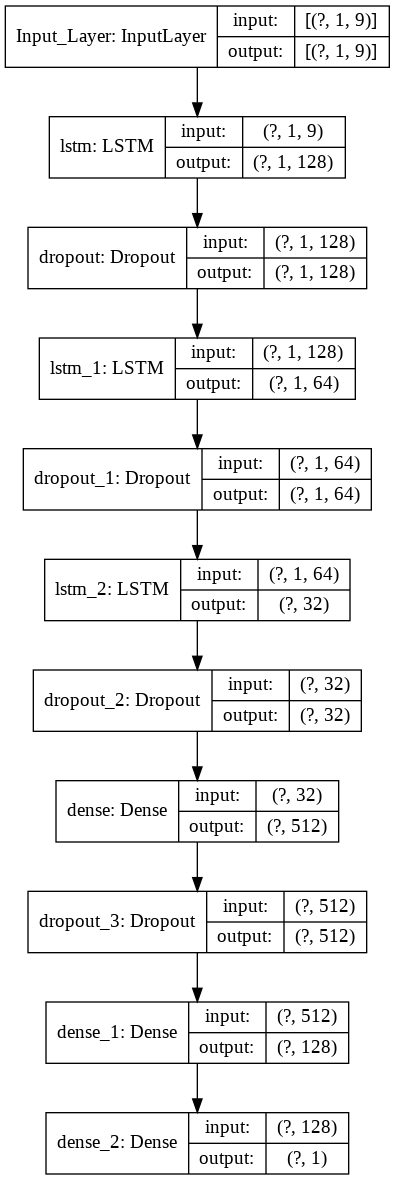

In [ ]:
plot_model(model,show_shapes=True,to_file='Model.png')

In [ ]:
model.compile(optimizer='adam', 
                  loss='mean_absolute_error', 
                )

In [ ]:
import datetime
!rm -r logs*   #removing the previous execution logs

#tensorboard
log_dir="logs\\fit\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)

callbacks=[ tensorboard_callback]

history = model.fit(X_train, 
              y_train, 
              epochs = 15, 
              callbacks=callbacks,
              batch_size = 256, 
              validation_data = (X_test, y_test),
              verbose = 1)

Epoch 1/15
   2/1236 [..............................] - ETA: 2:57 - loss: 15212.5186

1236/1236 [==============================] - 27s 22ms/step - loss: 13839.7871 - val_loss: 10926.6309
Epoch 2/15
1236/1236 [==============================] - 25s 20ms/step - loss: 13741.5020 - val_loss: 10973.8154
Epoch 3/15
1236/1236 [==============================] - 25s 20ms/step - loss: 13759.3428 - val_loss: 10958.3135
Epoch 4/15
1236/1236 [==============================] - 25s 20ms/step - loss: 13733.2969 - val_loss: 10978.0361
Epoch 5/15
1236/1236 [==============================] - 25s 20ms/step - loss: 13717.9053 - val_loss: 10938.7090
Epoch 6/15
1236/1236 [==============================] - 25s 20ms/step - loss: 13745.6670 - val_loss: 10934.0469
Epoch 7/15
1236/1236 [==============================] - 25s 20ms/step - loss: 13714.3154 - val_loss: 10908.8193
Epoch 8/15
1236/1236 [==============================] - 25s 20ms/step - loss: 13729.4629 - val_loss: 10996.2646
Epoch 9/15
1236/1236 [==============================] - 25s 20ms/step - loss: 13732.3643 - val_loss: 10911.3223
Epo

In [ ]:
X_train.shape

(316177, 1, 9)

In [ ]:
test_data=test_data_final.set_index("Date")


In [ ]:
test_data=test_data.values


test_data = test_data.reshape((test_data.shape[0], 1, test_data.shape[1]))

In [ ]:
final_predictions_LSTM.reshape(1,-1)[0]

array([5650.086, 5650.395, 5650.393, ..., 4431.356, 4431.612, 4431.644],
      dtype=float32)

In [ ]:
final_predictions_LSTM=model.predict(test_data)

submission = pd.DataFrame({
        "Id": test_data_final.Store.astype(str)+'_'+test_data_final.Dept.astype(str)+'_'+test_data_final.Date.astype(str),
        "Weekly_Sales": final_predictions_LSTM.reshape(1,-1)[0]
    })

submission.to_csv('Submission_LSTM.csv', index=False)

<img src='https://i.imgur.com/byKDrUz.png'/>

## FINAL CONCLUSIONS 

In [10]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names=["Model","Best Test split score","Kaggle Score"]
x.add_row(["Linear Regression","14860.76","-"])
x.add_row(["Decision Tress","2642.47","-"])
x.add_row(["Random Forest", "1503.92","2754.365"])
x.add_row(["XGBoost","1288.72","2952.61"])
x.add_row(["AdaBoost","11650.77","-"])
x.add_row(["Ensembling", "1498.57","3118.30"])
x.add_row(["Prophet","13638.28","20813.722"])
x.add_row(["LSTM", "10966","18341.41"])
print(x)

+-------------------+-----------------------+--------------+
|       Model       | Best Test split score | Kaggle Score |
+-------------------+-----------------------+--------------+
| Linear Regression |        14860.76       |      -       |
|   Decision Tress  |        2642.47        |      -       |
|   Random Forest   |        1503.92        |   2754.365   |
|      XGBoost      |        1288.72        |   2952.61    |
|      AdaBoost     |        11650.77       |      -       |
|     Ensembling    |        1498.57        |   3118.30    |
|      Prophet      |        13638.28       |  20813.722   |
|        LSTM       |         10966         |   18341.41   |
+-------------------+-----------------------+--------------+


<b>
    Final Conclusions:
    
    1. Random forest on Hyper tuning performed very well, giving the WMAE score of ~2754 on the test data upon submission in Kaggle. 
    2. On a private board WMAE of 2754 gives the rank of 37th, And on Public board that gives the rank  of 68th. 
    3. As the WMAE is not a metric from sklearn we have defined it and did hyperparameter tuning using loops over the parameters.
    4. XGBoost has given the best result of 1288.72 on the test split data but gave a result of 2956 on test_data of Kaggle. 
    5. Upon approaching Ensembling, Adaboost, Prophet, XGBoost, LSTM, Decision Trees, Random Forest , it  is observed that taking all the features degrade the score still. Hence took only few features which are not correlated and that gave a good score.
    